In [172]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# SOMMAIRE


### [CHARGEMENT DES DONNEES](#section1)

### [VERIFICATION DES DONNEES](#section2)

### [CONSTRUCTION DES VARIABLES ET ANALYSES UNIVARIES/ BIVARIES](#section3)

### [DENDROGRAMME](#section4)
            
### [KMEANS](#section5)

### [ANALYSES COMPOSANTES PRINCIPALES](#section6)

### [COMPARAISON DENDROGRAMME VS KMEANS](#section7)

 ### [RESULTATS](#section8)


<a id='section1'></a>
# <big><font face="'Montserrat'" color="#0c4da2">CHARGEMENT DES DONNEES </font></big>

In [173]:
dfdispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
pop =  pd.read_csv('Population_2000_2018.csv')
costprod = pd.read_csv('prixprod2017.csv')
inflation= pd.read_csv('foodinflation2017.csv')
change = pd.read_csv('txdechange2017.csv')
income = pd.read_csv('revenu2017.csv')
#'chargement des donnees

<a id='section2'></a>
# <big><font face="'Montserrat'" color="#0c4da2">VERIFICATION DES DONNEES </font></big>

In [174]:
dfdispo.head()
#observations du dataframe disponilibilé alimentaire

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [175]:
dfdispo.info()
#verifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [176]:
dfdispo.describe(include='all')
#verifications

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [177]:
pop.head()
#observations du datafralm population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [178]:
pop.info()
#verifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [179]:
pop.describe(include='all')
#verifications

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Ghana,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [180]:
inflation.head()
#observations du dataframe inflation

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7001,Janvier,%,4.698328,Fc,Donnée calculée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7002,Février,%,4.553673,Fc,Donnée calculée,NaN
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7003,Mars,%,10.028383,Fc,Donnée calculée,NaN
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7004,Avril,%,9.367880,Fc,Donnée calculée,NaN
4,CP,Indices de Prix à la Consommation,4,Afghanistan,2017,2017,23014,Food price inflation,7005,Mai,%,10.723921,Fc,Donnée calculée,NaN


In [181]:
inflation.info()
#verifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2400 non-null   object 
 1   Domaine                 2400 non-null   object 
 2   Code zone (M49)         2400 non-null   int64  
 3   Zone                    2400 non-null   object 
 4   Code année              2400 non-null   int64  
 5   Année                   2400 non-null   int64  
 6   Code Produit            2400 non-null   int64  
 7   Produit                 2400 non-null   object 
 8   Code Mois               2400 non-null   int64  
 9   Mois                    2400 non-null   object 
 10  Unité                   2400 non-null   object 
 11  Valeur                  2400 non-null   float64
 12  Symbole                 2400 non-null   object 
 13  Description du Symbole  2400 non-null   object 
 14  Note                    0 non-null      

In [182]:
inflation.describe(include='all')
#verifications

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
count,2400,2400,2400.000000,2400,2400.0,2400.0,2400.0,2400,2400.000000,2400,2400,2400.000000,2400,2400,0.0
unique,1,1,NaN,200,NaN,NaN,NaN,1,NaN,12,1,NaN,1,1,NaN
top,CP,Indices de Prix à la Consommation,NaN,Ghana,NaN,NaN,NaN,Food price inflation,NaN,Juin,%,NaN,Fc,Donnée calculée,NaN
freq,2400,2400,NaN,12,NaN,NaN,NaN,2400,NaN,200,2400,NaN,2400,2400,NaN
mean,NaN,NaN,427.055000,NaN,2017.0,2017.0,23014.0,NaN,7006.500000,NaN,NaN,7.944404,NaN,NaN,NaN
std,NaN,NaN,249.374986,NaN,0.0,0.0,0.0,NaN,3.452772,NaN,NaN,41.874644,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,2017.0,2017.0,23014.0,NaN,7001.000000,NaN,NaN,-9.009141,NaN,NaN,NaN
25%,NaN,NaN,213.500000,NaN,2017.0,2017.0,23014.0,NaN,7003.750000,NaN,NaN,0.519399,NaN,NaN,NaN
50%,NaN,NaN,427.000000,NaN,2017.0,2017.0,23014.0,NaN,7006.500000,NaN,NaN,2.444847,NaN,NaN,NaN
75%,NaN,NaN,639.000000,NaN,2017.0,2017.0,23014.0,NaN,7009.250000,NaN,NaN,5.915916,NaN,NaN,NaN


In [183]:
change.head()
#observations du dataframe change

,Code Domaine,Domaine,Code zone (FAO),Zone,Code de devise ISO (FAO),Devise,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,PE,Taux de change - Annuels,2,Afghanistan,AFN,Afghani,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,68.026904,X,Sources internationales sûres,Data from UNSD AMA
1,PE,Taux de change - Annuels,202,Afrique du Sud,ZAR,Rand,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,13.333781,X,Sources internationales sûres,Data from UNSD AMA
2,PE,Taux de change - Annuels,3,Albanie,ALL,Lek,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,119.099667,X,Sources internationales sûres,Data from UNSD AMA
3,PE,Taux de change - Annuels,4,Algérie,DZD,Algerian Dinar,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,110.973017,X,Sources internationales sûres,Data from UNSD AMA
4,PE,Taux de change - Annuels,79,Allemagne,EUR,Euro,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,0.885206,X,Sources internationales sûres,Data from UNSD AMA


In [184]:
change.info()
#verifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code Domaine              210 non-null    object 
 1   Domaine                   210 non-null    object 
 2   Code zone (FAO)           210 non-null    int64  
 3   Zone                      210 non-null    object 
 4   Code de devise ISO (FAO)  210 non-null    object 
 5   Devise                    210 non-null    object 
 6   Code Produit              210 non-null    int64  
 7   Produit                   210 non-null    object 
 8   Code année                210 non-null    int64  
 9   Année                     210 non-null    int64  
 10  Unité                     0 non-null      float64
 11  Valeur                    210 non-null    float64
 12  Symbole                   210 non-null    object 
 13  Description du Symbole    210 non-null    object 
 14  Note      

In [185]:
change.describe(include='all')
#verifications

,Code Domaine,Domaine,Code zone (FAO),Zone,Code de devise ISO (FAO),Devise,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,210,210,210.000000,210,210,210,210.0,210,210.0,210.0,0.0,210.000000,210,210,210
unique,1,1,NaN,210,149,149,NaN,1,NaN,NaN,NaN,NaN,1,1,1
top,PE,Taux de change - Annuels,NaN,Ghana,EUR,Euro,NaN,Unités de monnaie locale standardisée par USD,NaN,NaN,NaN,NaN,X,Sources internationales sûres,Data from UNSD AMA
freq,210,210,NaN,1,23,23,NaN,210,NaN,NaN,NaN,NaN,210,210,210
mean,NaN,NaN,130.280952,NaN,NaN,NaN,5540.0,NaN,2017.0,2017.0,NaN,819.998620,NaN,NaN,NaN
std,NaN,NaN,76.484368,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,3470.825579,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,5540.0,NaN,2017.0,2017.0,NaN,0.303350,NaN,NaN,NaN
25%,NaN,NaN,63.750000,NaN,NaN,NaN,5540.0,NaN,2017.0,2017.0,NaN,1.323791,NaN,NaN,NaN
50%,NaN,NaN,128.500000,NaN,NaN,NaN,5540.0,NaN,2017.0,2017.0,NaN,8.148834,NaN,NaN,NaN
75%,NaN,NaN,193.750000,NaN,NaN,NaN,5540.0,NaN,2017.0,2017.0,NaN,117.736625,NaN,NaN,NaN


In [186]:
income.head()
#observations du dataframe income

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,519.395889,Fc,Donnée calculée,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22011,Revenu national brut,2017,2017,%,3.554820,Fc,Donnée calculée,NaN
2,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22011,Revenu national brut,2017,2017,%,0.949750,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,5938.277421,Fc,Donnée calculée,NaN
4,MK,Indicateurs macro,202,Afrique du Sud,6129,Croissance annuelle US$,22011,Revenu national brut,2017,2017,%,17.486899,Fc,Donnée calculée,NaN


In [187]:
income.info()
#verifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            633 non-null    object 
 1   Domaine                 633 non-null    object 
 2   Code zone (FAO)         633 non-null    int64  
 3   Zone                    633 non-null    object 
 4   Code Élément            633 non-null    int64  
 5   Élément                 633 non-null    object 
 6   Code Produit            633 non-null    int64  
 7   Produit                 633 non-null    object 
 8   Code année              633 non-null    int64  
 9   Année                   633 non-null    int64  
 10  Unité                   633 non-null    object 
 11  Valeur                  633 non-null    float64
 12  Symbole                 633 non-null    object 
 13  Description du Symbole  633 non-null    object 
 14  Note                    0 non-null      fl

In [188]:
income.describe(include='all')
#verifications

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,633,633,633.000000,633,633.000000,633,633.0,633,633.0,633.0,633,633.000000,633,633,0.0
unique,1,1,NaN,211,NaN,3,NaN,1,NaN,NaN,2,NaN,1,1,NaN
top,MK,Indicateurs macro,NaN,Ghana,NaN,Valeur US $ par habitant,NaN,Revenu national brut,NaN,NaN,%,NaN,Fc,Donnée calculée,NaN
freq,633,633,NaN,3,NaN,211,NaN,633,NaN,NaN,422,NaN,633,633,NaN
mean,NaN,NaN,131.327014,NaN,24512.666667,NaN,22011.0,NaN,2017.0,2017.0,NaN,5450.547104,NaN,NaN,NaN
std,NaN,NaN,77.677108,NaN,26026.067956,NaN,0.0,NaN,0.0,0.0,NaN,16257.165628,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,6119.000000,NaN,22011.0,NaN,2017.0,2017.0,NaN,-29.717969,NaN,NaN,NaN
25%,NaN,NaN,63.000000,NaN,6119.000000,NaN,22011.0,NaN,2017.0,2017.0,NaN,4.999091,NaN,NaN,NaN
50%,NaN,NaN,129.000000,NaN,6129.000000,NaN,22011.0,NaN,2017.0,2017.0,NaN,9.833736,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,61290.000000,NaN,22011.0,NaN,2017.0,2017.0,NaN,1984.058427,NaN,NaN,NaN


<a id='section3'></a>
# <big><font face="'Montserrat'" color="#0c4da2">CONSTRUCTION DES VARIABLES ET ANALYSES UNIVARIES/ BIVARIES </font></big>

In [189]:
dfdispo['Produit'].unique()
#recherche des champs utiles pour l'analyse

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [190]:
dispoclean= dfdispo[ dfdispo['Produit'] ==  'Viande de Volailles' ]
dispoclean.head()
#recupération des infos sur la volaille

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [191]:
dispoclean = dispoclean[['Code zone','Zone','Élément','Unité','Valeur']]
dispoclean.head(10)
#conservation des colonnes utiles

,Code zone,Zone,Élément,Unité,Valeur
651,2,Afghanistan,Production,Milliers de tonnes,28.00
652,2,Afghanistan,Importations - Quantité,Milliers de tonnes,29.00
653,2,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,2,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.00
655,2,Afghanistan,Pertes,Milliers de tonnes,2.00
656,2,Afghanistan,Résidus,Milliers de tonnes,0.00
657,2,Afghanistan,Nourriture,Milliers de tonnes,55.00
658,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,kg,1.53
659,2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,5.00
660,2,Afghanistan,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.54


In [192]:
dispoclean['Élément'].unique()
# lecture et recherhe d'éléments nécessaire pour construire la variable

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [193]:
importclean= dispoclean[ dispoclean['Élément'] ==  'Importations - Quantité' ]
importclean= importclean[['Zone','Valeur']]
importclean['Valeur'] = importclean['Valeur']  * 1000000
importclean= importclean.rename(columns={'Valeur': 'importkg'})
importclean

#transformation de la colonne pour avoir des kg pour la construction de l'indicateur à suivre

,Zone,importkg
652,Afghanistan,29000000.0
1705,Afrique du Sud,514000000.0
2714,Albanie,38000000.0
3773,Algérie,2000000.0
4874,Allemagne,842000000.0
...,...,...
172329,Venezuela (République bolivarienne du),25000000.0
173388,Viet Nam,291000000.0
174319,Yémen,78000000.0
175362,Zambie,12000000.0


In [194]:
popclean= pop[ pop['Année'] ==  2017 ]
popclean= popclean[['Zone', 'Valeur']]
popclean= popclean.rename(columns={'Valeur': 'population'})
popclean['population'] = popclean['population'] * 1000
popclean.head()
#traduction de la population en unité

,Zone,population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0


In [195]:
kghabclean = pd.merge(importclean, popclean ,how="left", on=["Zone", "Zone"])
kghabclean['importkgparhab'] = kghabclean['importkg']/kghabclean['population']
kghabclean = kghabclean[['Zone','importkgparhab']]
kghabclean
#construction d un indicateur personnalisé pour avoir l'importation par habitant pour avoir une échelle comparable

,Zone,importkgparhab
0,Afghanistan,0.798984
1,Afrique du Sud,9.016001
2,Albanie,13.175372
3,Algérie,0.048322
4,Allemagne,10.186501
...,...,...
165,Venezuela (République bolivarienne du),0.850268
166,Viet Nam,3.076089
167,Yémen,2.802246
168,Zambie,0.712014


In [196]:
kgclean =dispoclean[ dispoclean['Élément'] ==  'Disponibilité alimentaire en quantité (kg/personne/an)' ] 
kgclean= kgclean[['Zone','Valeur']]
kgclean= kgclean.rename(columns={'Valeur': 'dispokg'})
kgclean
#construction d un autre outil de quantification

,Zone,dispokg
658,Afghanistan,1.53
1713,Afrique du Sud,35.69
2720,Albanie,16.36
3781,Algérie,6.38
4881,Allemagne,19.47
...,...,...
172337,Venezuela (République bolivarienne du),20.28
173396,Viet Nam,12.33
174325,Yémen,8.53
175370,Zambie,3.42


In [197]:
inflationclean = inflation.groupby('Zone')['Valeur'].mean().reset_index().round(2)
inflationclean= inflationclean.rename(columns={'Valeur': 'inflationmoy2017'})
inflationclean
#construction d'une variable de l'inflation moyenne d 'un pays

,Zone,inflationmoy2017
0,Afghanistan,6.96
1,Afrique du Sud,6.91
2,Albanie,4.14
3,Algérie,5.04
4,Allemagne,2.76
...,...,...
195,Îles Caïmanes,0.74
196,Îles Cook,0.64
197,Îles Salomon,-0.65
198,Îles Vierges britanniques,-1.83


In [198]:
changeclean= change[['Zone','Valeur']].round(2)
changeclean =changeclean.rename(columns={'Valeur': 'txchange_2017'})
changeclean.head()
#construction d'une variable dsur le taux de change d 'un pays

,Zone,txchange_2017
0,Afghanistan,68.03
1,Afrique du Sud,13.33
2,Albanie,119.10
3,Algérie,110.97
4,Allemagne,0.89


In [199]:
incomeclean=income[['Zone','Élément' ,'Valeur']].round(2)
incomeclean=incomeclean.rename(columns={'Valeur': 'Revenu2017'})
incomeclean
#selection des variables necessaires

,Zone,Élément,Revenu2017
0,Afghanistan,Valeur US $ par habitant,519.40
1,Afghanistan,Croissance annuelle US$,3.55
2,Afghanistan,Croissance annuelle US$ par habitant,0.95
3,Afrique du Sud,Valeur US $ par habitant,5938.28
4,Afrique du Sud,Croissance annuelle US$,17.49
...,...,...,...
628,Zambie,Croissance annuelle US$,23.41
629,Zambie,Croissance annuelle US$ par habitant,19.82
630,Zimbabwe,Valeur US $ par habitant,1410.42
631,Zimbabwe,Croissance annuelle US$,6.96


In [200]:
revenuclean= incomeclean[ incomeclean['Élément'] ==  'Valeur US $ par habitant' ].round(2)
revenuclean=revenuclean[['Zone','Revenu2017']]
revenuclean
#construction d'une variable sur le revenu moyen par habitant d un pays

,Zone,Revenu2017
0,Afghanistan,519.40
3,Afrique du Sud,5938.28
6,Albanie,4525.23
9,Algérie,4056.01
12,Allemagne,45609.06
...,...,...
618,Venezuela (République bolivarienne du),8209.28
621,Viet Nam,2187.26
624,Yémen,740.99
627,Zambie,1486.69


In [201]:
croissanceclean= incomeclean[ incomeclean['Élément'] ==  'Croissance annuelle US$ par habitant' ].round(2)
croissanceclean=croissanceclean[['Zone','Revenu2017']]
croissanceclean =croissanceclean.rename(columns={'Revenu2017': 'Croissance2017'})
croissanceclean
#construction d'une variable sur la croissance moyenne d'un pays

,Zone,Croissance2017
2,Afghanistan,0.95
5,Afrique du Sud,15.83
8,Albanie,8.36
11,Algérie,3.53
14,Allemagne,5.49
...,...,...
620,Venezuela (République bolivarienne du),-12.79
623,Viet Nam,4.13
626,Yémen,-8.27
629,Zambie,19.82


In [202]:
final = pd.merge(kghabclean, revenuclean ,how="left", on=["Zone", "Zone"])
final = pd.merge(final, croissanceclean,how="left", on=["Zone", "Zone"])
final = pd.merge(final, inflationclean, how="left",on=["Zone", "Zone"])
final = pd.merge(final, kgclean,how="left", on=["Zone", "Zone"])
final = pd.merge(final, changeclean,how="left", on=["Zone", "Zone"])
final
# jointure final pour avoir l'ensemble des variables utiles sur un meme support

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
0,Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
1,Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
2,Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
3,Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
4,Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...,...
165,Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
166,Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
167,Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25
168,Zambie,0.712014,1486.69,19.82,5.77,3.42,9.52


In [203]:
verifnuls = final.isnull().sum()
verifnuls
# verifications des nulls

Zone                0
importkgparhab      0
Revenu2017          1
Croissance2017      1
inflationmoy2017    6
dispokg             0
txchange_2017       1
dtype: int64

In [204]:
visunul = final.loc[final['inflationmoy2017'].isnull(),:]
visunul
#visualisation des nulls

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
34,"Chine, Taiwan Province de",6.800553,NaN,NaN,NaN,33.17,NaN
41,Cuba,27.515038,8421.19,5.96,NaN,23.72,1.00
67,Guyana,0.000000,6140.29,3.49,NaN,38.34,206.50
128,République centrafricaine,0.870318,473.87,16.37,NaN,2.29,580.66
132,République populaire démocratique de Corée,0.000000,684.37,2.88,NaN,1.62,107.74
160,Turkménistan,1.563133,6311.87,1.49,NaN,4.52,3.50


In [205]:
verif= final[final.importkgparhab == 0]
verif
#verifications des pays avec des donnees a zero en import

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
14,Bangladesh,0.0,1604.33,8.77,7.17,1.50,80.44
18,Belize,0.0,4479.73,-0.95,-1.13,25.69,2.00
25,Burkina Faso,0.0,707.40,7.57,2.04,2.27,580.66
28,Cameroun,0.0,1398.19,4.27,0.04,3.16,580.66
48,Équateur,0.0,6068.28,2.09,0.50,19.31,1.00
67,Guyana,0.0,6140.29,3.49,NaN,38.34,206.50
72,Inde,0.0,1940.14,13.49,1.82,2.22,65.12
78,Israël,0.0,42417.71,8.83,0.03,67.39,3.60
84,Kenya,0.0,1542.31,10.96,13.51,0.67,103.41
95,Madagascar,0.0,499.39,9.40,9.30,2.87,3116.11


In [206]:
final = final[final.importkgparhab != 0]
final
#exclusions des pays avec zero import

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
0,Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
1,Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
2,Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
3,Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
4,Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...,...
165,Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
166,Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
167,Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25
168,Zambie,0.712014,1486.69,19.82,5.77,3.42,9.52


In [207]:
verifnuls2= final.isnull().sum()
verifnuls2
# verifications des nulls

Zone                0
importkgparhab      0
Revenu2017          1
Croissance2017      1
inflationmoy2017    4
dispokg             0
txchange_2017       1
dtype: int64

In [208]:
visunul2= final.loc[final['inflationmoy2017'].isnull(),:]
visunul2
#visualisation des nulls

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
34,"Chine, Taiwan Province de",6.800553,NaN,NaN,NaN,33.17,NaN
41,Cuba,27.515038,8421.19,5.96,NaN,23.72,1.00
128,République centrafricaine,0.870318,473.87,16.37,NaN,2.29,580.66
160,Turkménistan,1.563133,6311.87,1.49,NaN,4.52,3.50


In [209]:
final['inflationmoy2017'] = final['inflationmoy2017'].replace(np.nan, 0)
final
#remplacement de l inflation par un zero 

<ipython-input-209-a6e0fda0359a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['inflationmoy2017'] = final['inflationmoy2017'].replace(np.nan, 0)


,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
0,Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
1,Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
2,Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
3,Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
4,Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...,...
165,Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
166,Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
167,Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25
168,Zambie,0.712014,1486.69,19.82,5.77,3.42,9.52


In [210]:
final = final[final['Zone'] !=  'Chine, Taiwan Province de' ]
final
#exclusion de taiwan vs trop d informations economique manquantes et presentant un trop grand risque d'erreur

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
0,Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
1,Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
2,Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
3,Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
4,Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...,...
165,Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
166,Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
167,Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25
168,Zambie,0.712014,1486.69,19.82,5.77,3.42,9.52


In [211]:
verifnuls3= final.isnull().sum()
verifnuls3
#verification des nulls

Zone                0
importkgparhab      0
Revenu2017          0
Croissance2017      0
inflationmoy2017    0
dispokg             0
txchange_2017       0
dtype: int64

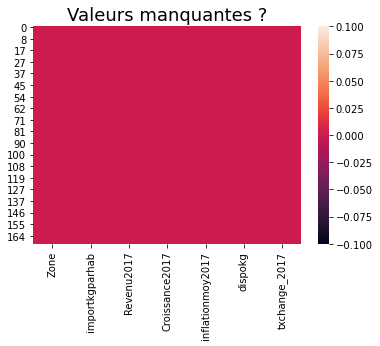

In [212]:
sns.heatmap(final.isnull())
plt.title("Valeurs manquantes ?", fontsize = 18)
plt.show()
#visualisation des nulls

In [213]:
final

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
0,Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
1,Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
2,Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
3,Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
4,Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...,...
165,Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
166,Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
167,Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25
168,Zambie,0.712014,1486.69,19.82,5.77,3.42,9.52


In [214]:
final.describe(include='all')

,Zone,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
count,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,150,NaN,NaN,NaN,NaN,NaN,NaN
top,Ghana,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.442754,14811.749467,6.242733,7.323467,21.499133,797.465867
std,NaN,19.444879,18736.701089,6.698183,39.452040,15.380731,3575.455514
min,NaN,0.003779,450.170000,-29.720000,-3.720000,0.130000,0.300000
25%,NaN,1.475101,2615.202500,3.580000,0.542500,9.642500,1.725000
50%,NaN,5.849380,6589.405000,6.175000,2.520000,18.965000,9.035000
75%,NaN,12.670638,17947.437500,9.385000,5.687500,30.385000,107.805000


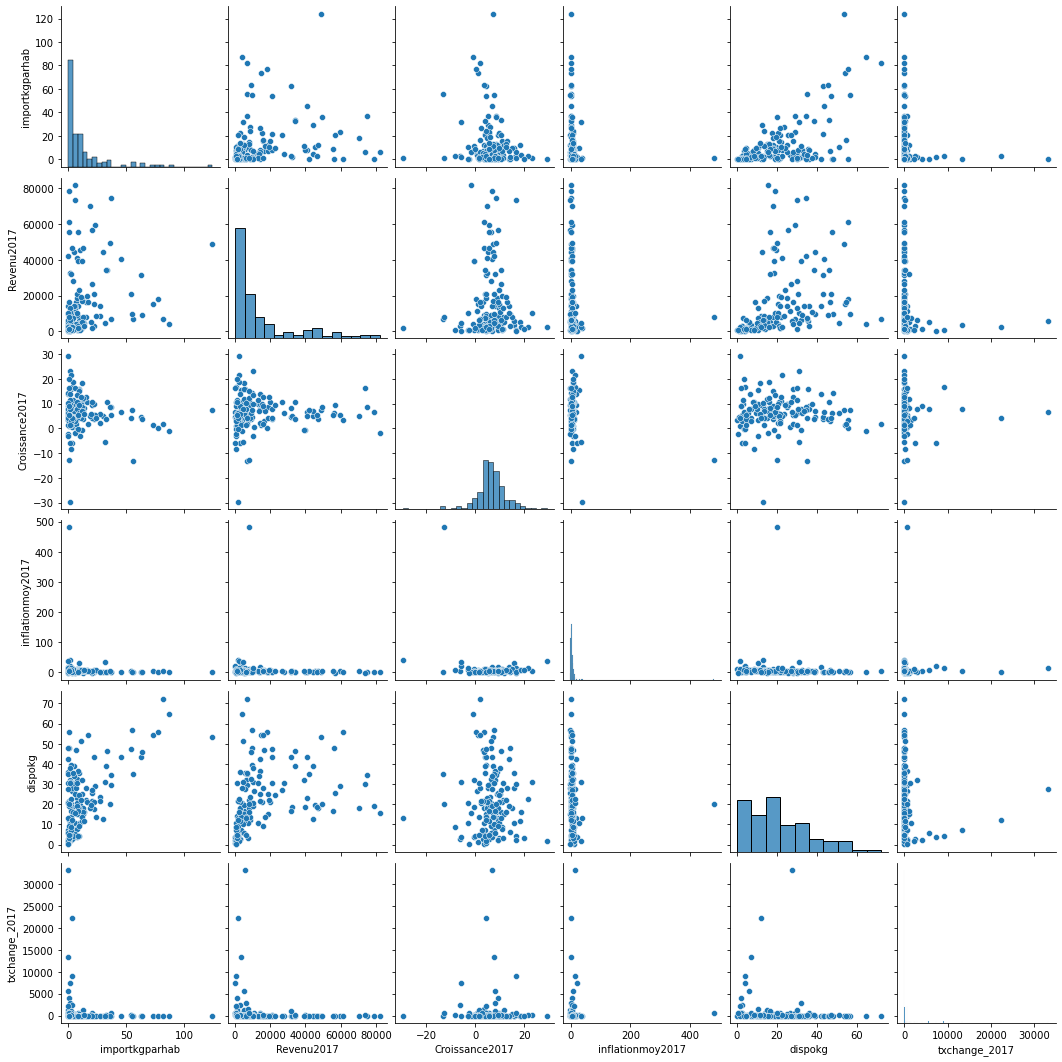

In [215]:
sns.pairplot(final)

In [216]:
print(final.shape)

(150, 7)


In [217]:
final1 = final
final1.set_index('Zone', inplace=True)

final1

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
Zone,,,,,,
Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03
Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33
Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10
Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97
Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89
...,...,...,...,...,...,...
Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69
Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09
Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25


<a id='section4'></a>
# <big><font face="'Montserrat'" color="#0c4da2">DENDROGRAMME </font></big>

In [218]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
T = pd.DataFrame(sc.fit_transform(final1.values), columns=final1.columns, index=final1.index)
T
#centrage et reduction des données

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017
Zone,,,,,,
Afghanistan,-0.600815,-0.765355,-0.792822,-0.009244,-1.302671,-0.204695
Afrique du Sud,-0.176819,-0.475174,1.436119,-0.010515,0.925730,-0.220045
Albanie,0.037803,-0.550843,0.317155,-0.080962,-0.335247,-0.190364
Algérie,-0.639549,-0.575970,-0.406352,-0.058073,-0.986285,-0.192646
Allemagne,-0.116422,1.649196,-0.112755,-0.116059,-0.132369,-0.223536
...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.598169,-0.353562,-2.850996,12.043051,-0.079529,-0.053255
Viet Nam,-0.483317,-0.676041,-0.316476,-0.213464,-0.598141,6.053745
Yémen,-0.497447,-0.753489,-2.173926,-0.004157,-0.846031,-0.153561


In [219]:
T.shape

(150, 6)

In [220]:
n = T.shape[0]
p = T.shape[1]

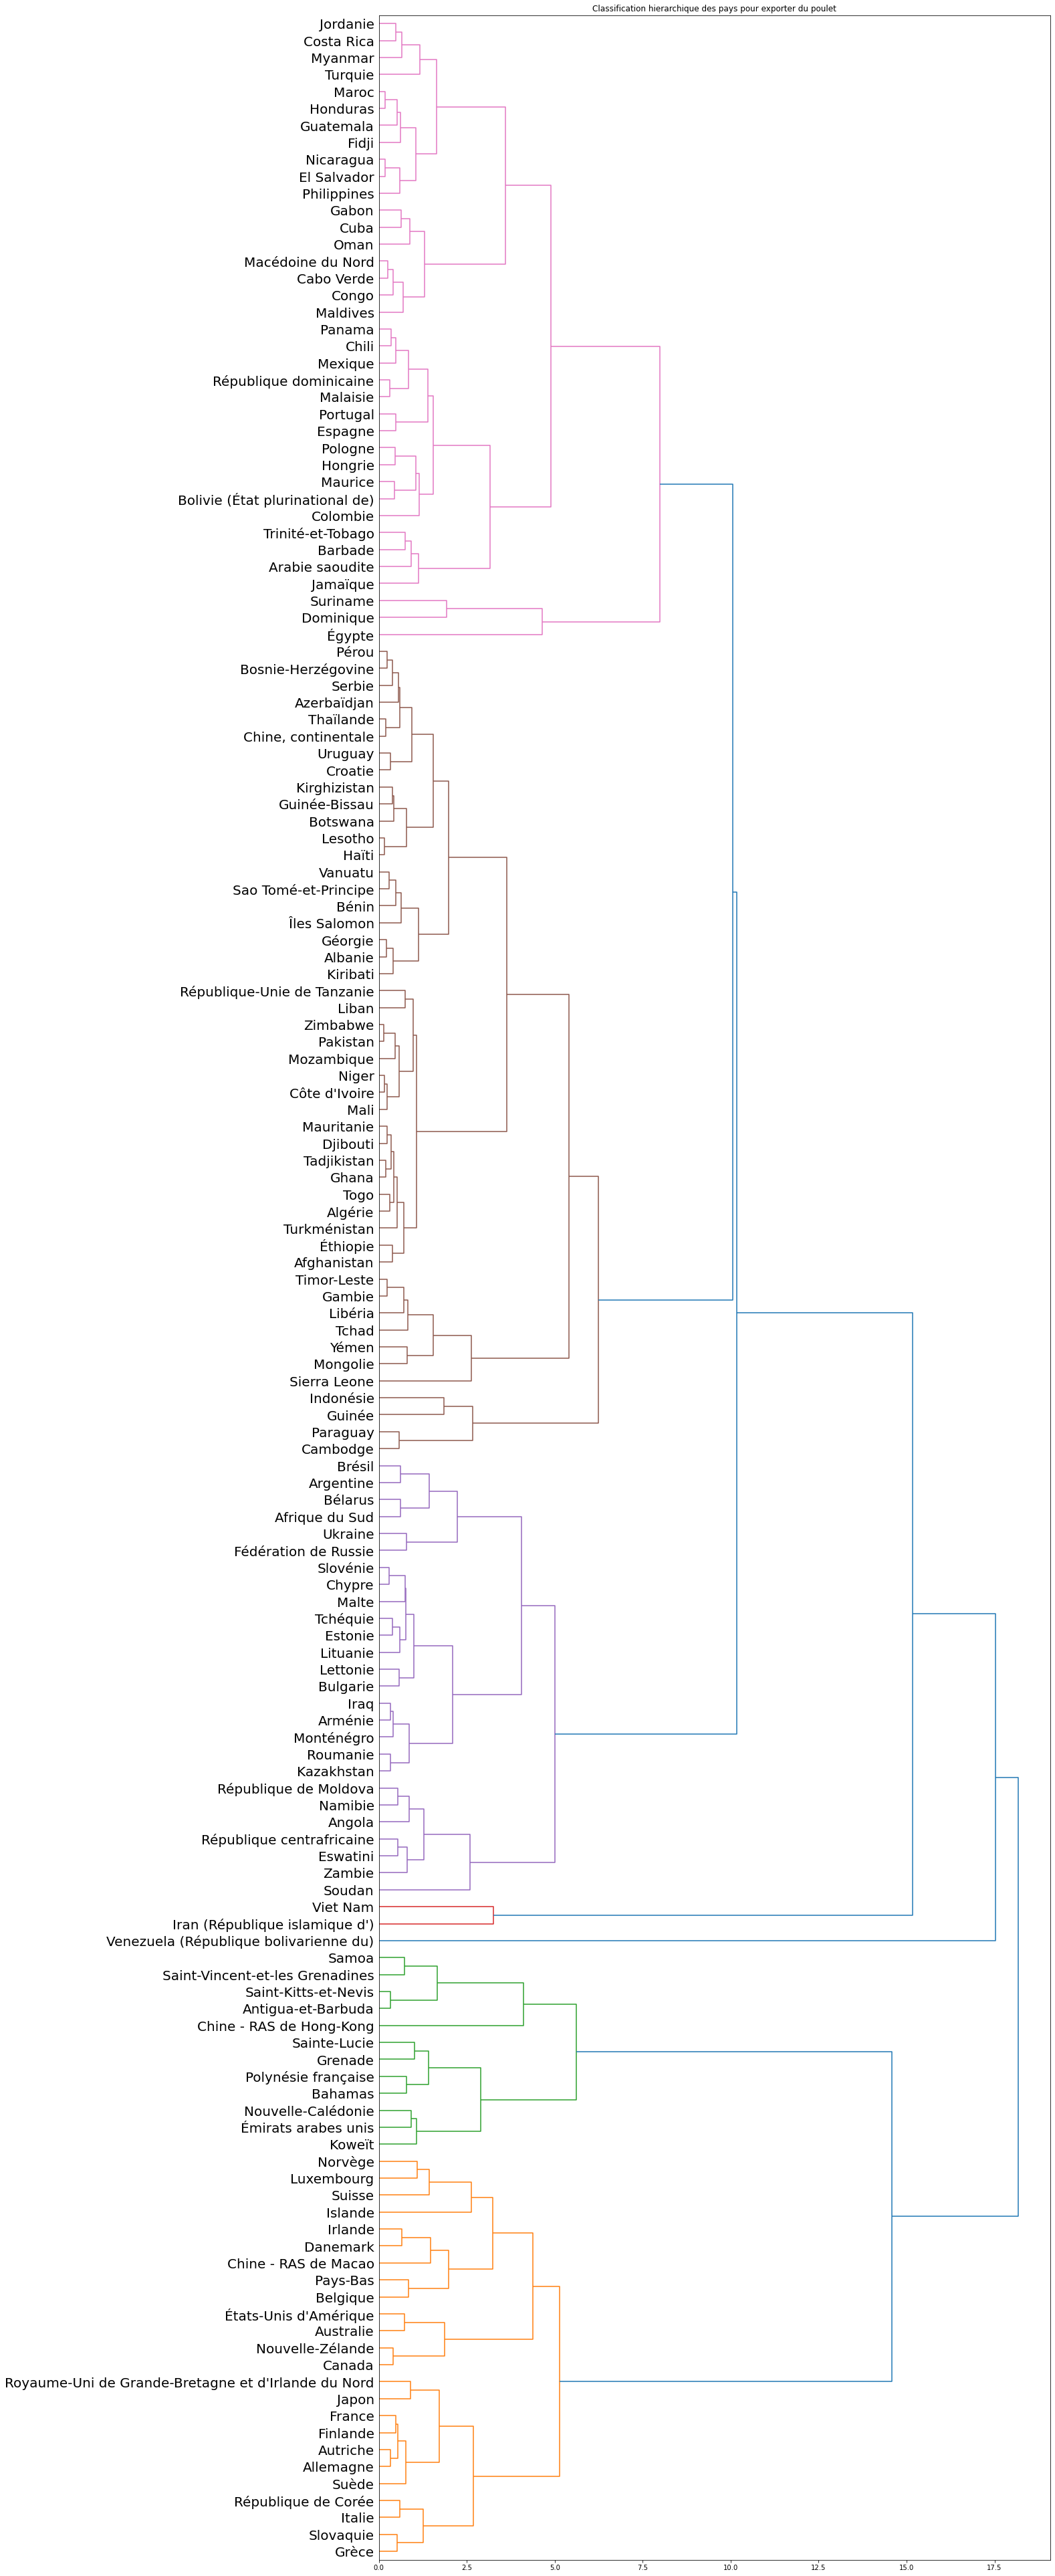

In [221]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage, fcluster
fig = plt.figure(figsize=(18, 70))

Z = linkage(T,method= 'ward' ,metric ='euclidean' )
#affichage du dendrogramme
plt.title("Classification hierarchique des pays pour exporter du poulet")
dendrogram(Z,labels=T.index,orientation="right",leaf_font_size=20,color_threshold=9.5)


plt.show()

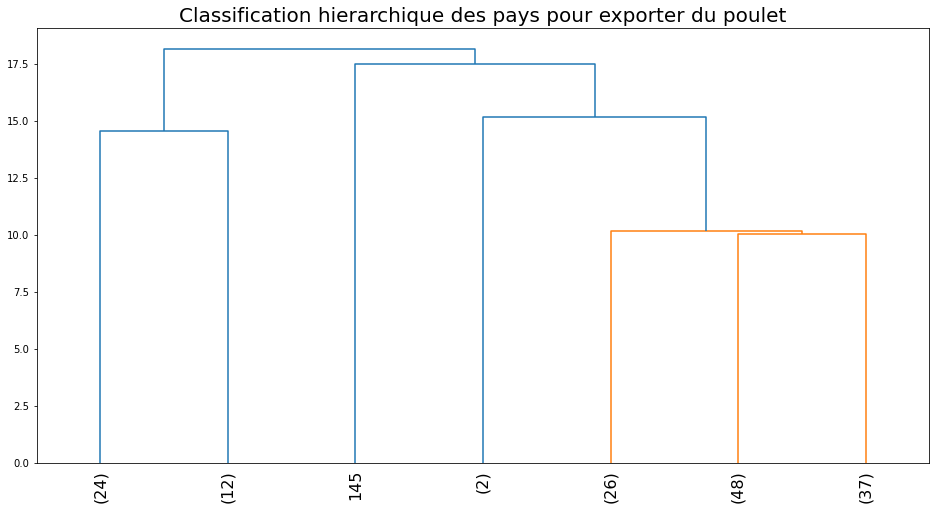

In [222]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage, fcluster
fig = plt.figure(figsize=(16,8))

Z2 = linkage(T,method= 'ward' ,metric ='euclidean' )
#affichage du dendrogramme

dendrogram(Z2,truncate_mode='lastp', p=7, show_leaf_counts=True, leaf_rotation=90,leaf_font_size=16)

plt.title("Classification hierarchique des pays pour exporter du poulet", size=20)

plt.show()


In [223]:
cluster_cah= fcluster(Z, t=9.5, criterion='distance')
cluster_cah
#resultat de la classification de chaque pays en fonction des groupes

array([5, 4, 5, 5, 1, 4, 2, 6, 4, 4, 1, 1, 5, 2, 6, 4, 1, 5, 6, 5, 5, 4,
       4, 6, 5, 1, 6, 2, 1, 5, 4, 6, 6, 6, 5, 5, 6, 1, 5, 6, 6, 6, 2, 6,
       4, 4, 1, 5, 4, 6, 1, 1, 6, 5, 5, 5, 1, 2, 6, 5, 5, 5, 6, 6, 5, 5,
       3, 4, 1, 1, 1, 6, 1, 6, 4, 5, 5, 2, 5, 4, 5, 5, 4, 1, 6, 6, 6, 5,
       4, 6, 6, 5, 6, 5, 4, 5, 6, 4, 6, 5, 1, 2, 1, 6, 5, 6, 5, 1, 5, 6,
       6, 2, 6, 4, 1, 4, 6, 5, 4, 1, 2, 2, 2, 2, 5, 5, 5, 1, 4, 4, 1, 1,
       6, 5, 5, 4, 5, 5, 5, 6, 5, 6, 4, 5, 5, 7, 3, 5, 4, 5], dtype=int32)

In [224]:
np.unique(cluster_cah, return_counts=True)
#denombrement de chaque groupe

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([24, 12,  2, 26, 48, 37,  1], dtype=int64))

In [225]:
cahfinal = final.copy()
#création d'une copie

In [226]:
cahfinal['cluster_cah'] = cluster_cah.tolist()
cahfinal.head()
#rajout d une colonne pour connaitre l'appartenance a un groupe

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03,5
Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33,4
Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10,5
Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97,5
Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89,1


In [227]:
explicationcah = cahfinal.groupby(cluster_cah)
explicationcah.describe()
#resultats sur les groupes 

importkgparhab                                                         \
           count       mean        std        min        25%        50%   
1           24.0  11.195129  10.895122   0.212674   2.847618   8.093829   
2           12.0  65.900264  25.396338  32.473390  52.155918  63.001138   
3            2.0   1.575231   2.122533   0.074374   0.824802   1.575231   
4           26.0   8.469091   6.559152   0.014435   1.889106   9.456979   
5           48.0   3.793483   4.078464   0.003779   0.395607   2.133172   
6           37.0  10.828177  12.750112   0.036984   1.594771   5.961054   
7            1.0   0.850268        NaN   0.850268   0.850268   0.850268   

                         Revenu2017                ... txchange_2017  \
         75%         max      count          mean  ...           75%   
1  13.999823   36.942747       24.0  50257.762917  ...        6.9575   
2  78.129190  124.139068       12.0  22811.031667  ...        4.7000   
3   2.325660    3.076089        2.0   3955.980000  ...    30512.2475   
4  12.404311   22.038884       26.0   9658.051154  ...       25.7950   
5   6.096221   14.010017       48.0   3133.173542  ...      580.6600   
6  19.212333   55.976938       37.0   8762.725135  ...       54.6700   
7   0.850268    0.850268        1.0   8209.280000  ...      607.6900   

            cluster_cah                                     
        max       count mean  std  min  25%  50%  75%  max  
1   1130.42        24.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2    105.63        12.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
3  33226.30         2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
4   1184.00        26.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
5  13380.83        48.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0  
6   2951.33        37.0  6.0  0.0  6.0  6.0  6.0  6.0  6.0  
7    607.69         1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0  

[7 rows x 56 columns]

In [228]:
g1 = cahfinal[cahfinal['cluster_cah'] ==  1]
g1
#liste du groupe1

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89,1
Australie,0.650813,55801.63,6.23,0.31,47.65,1.30,1
Autriche,12.471795,46862.80,3.64,2.37,18.20,0.89,1
Belgique,29.597851,44423.61,5.02,1.27,12.65,0.89,1
Canada,4.954795,44394.73,7.00,-0.98,39.02,1.30,1
Chine - RAS de Macao,36.942747,74554.76,8.52,1.54,34.47,8.03,1
Danemark,23.201961,59207.05,5.40,2.80,28.98,6.60,1
États-Unis d'Amérique,0.378363,61073.94,3.42,-0.20,55.68,1.00,1
Finlande,2.903089,46336.56,5.40,-0.91,18.76,0.89,1


In [229]:
centroidg1 = g1.mean()
centroidg1
#centroid cah du groupe 1

importkgparhab         11.195129
Revenu2017          50257.762917
Croissance2017          5.610833
inflationmoy2017        1.185000
dispokg                24.733750
txchange_2017          58.226667
cluster_cah             1.000000
dtype: float64

In [230]:
g2 = cahfinal[cahfinal['cluster_cah'] == 2]
g2
#liste du groupe 2

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Antigua-et-Barbuda,73.355270,15106.49,1.22,1.87,54.10,2.70,2
Bahamas,62.867546,31747.90,4.43,-0.12,43.17,1.00,2
Chine - RAS de Hong-Kong,124.139068,48734.39,7.33,1.13,53.51,7.79,2
Émirats arabes unis,45.640427,40724.52,6.60,1.21,43.47,3.67,2
Grenade,63.134730,9211.28,3.56,0.54,45.70,2.70,2
Koweït,33.776296,34149.44,10.59,-0.30,46.25,0.30,2
Nouvelle-Calédonie,32.473390,34128.63,3.95,1.42,38.71,105.63,2
Polynésie française,54.327748,20852.10,4.23,1.82,47.40,105.63,2
Sainte-Lucie,55.262663,9632.92,7.51,-1.46,56.69,2.70,2


In [231]:
centroidg2 = g2.mean()
centroidg2
#centroid cah du groupe 2

importkgparhab         65.900264
Revenu2017          22811.031667
Croissance2017          4.205000
inflationmoy2017        0.771667
dispokg                51.820833
txchange_2017          20.005833
cluster_cah             2.000000
dtype: float64

In [232]:
g3 = cahfinal[cahfinal['cluster_cah'] ==  3]
g3
#liste du groupe 3

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Iran (République islamique d'),0.074374,5724.70,6.74,12.55,27.52,33226.30,3
Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09,3


In [233]:
centroidg3 = g3.mean()
centroidg3
#centroid cah du groupe 3

importkgparhab          1.575231
Revenu2017           3955.980000
Croissance2017          5.435000
inflationmoy2017        5.740000
dispokg                19.925000
txchange_2017       27798.195000
cluster_cah             3.000000
dtype: float64

In [234]:
g4 = cahfinal[cahfinal['cluster_cah'] == 4]
g4
#liste du groupe 4

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33,4
Angola,9.290075,3841.27,15.54,28.91,10.56,165.92,4
Argentine,0.182078,14253.56,13.74,17.67,42.24,16.56,4
Arménie,11.885394,4052.86,10.49,4.08,16.06,482.72,4
Bélarus,2.222168,5573.39,15.77,7.10,27.98,1.93,4
Brésil,0.014435,9739.80,14.25,0.95,48.03,3.19,4
Bulgarie,15.206033,8101.90,11.15,3.99,22.06,1.74,4
Chypre,11.867645,18605.56,8.64,-0.22,25.08,0.89,4
Estonie,15.916446,19935.57,10.65,5.72,21.26,0.89,4


In [235]:
centroidg4 = g4.mean()
centroidg4
#centroid cah du groupe 4

importkgparhab         8.469091
Revenu2017          9658.051154
Croissance2017        14.783462
inflationmoy2017       7.075000
dispokg               20.584231
txchange_2017        113.691923
cluster_cah            4.000000
dtype: float64

In [236]:
g5 = cahfinal[cahfinal['cluster_cah'] ==  5]
g5
#liste du groupe 5

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03,5
Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10,5
Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97,5
Azerbaïdjan,2.742420,3993.94,9.25,17.33,13.11,1.72,5
Bénin,11.006516,1124.04,4.29,1.76,14.40,580.66,5
Bosnie-Herzégovine,2.983716,5375.20,7.48,1.33,16.70,1.74,5
Botswana,1.360495,7309.62,9.82,3.45,3.39,10.35,5
Cambodge,0.624633,1299.25,9.03,3.42,2.34,4050.58,5
"Chine, continentale",0.318081,8656.31,9.40,-0.19,12.33,6.76,5


In [237]:
centroidg5 = g5.mean()
centroidg5
#centroid cah du groupe 5

importkgparhab         3.793483
Revenu2017          3133.173542
Croissance2017         5.198125
inflationmoy2017       4.838750
dispokg                7.075625
txchange_2017       1068.201875
cluster_cah            5.000000
dtype: float64

In [238]:
g6 = cahfinal[cahfinal['cluster_cah'] == 6]
g6
#liste du groupe 6

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Arabie saoudite,21.811912,21125.66,3.74,-0.82,43.36,3.75,6
Barbade,6.987339,16610.29,3.01,6.26,46.78,2.00,6
Bolivie (État plurinational de),0.089343,3272.04,8.92,3.37,36.00,6.91,6
Cabo Verde,22.325664,3179.56,5.37,-0.18,17.62,97.81,6
Chili,8.391788,14379.05,7.92,2.03,36.36,648.83,6
Colombie,1.594771,6260.18,7.80,0.72,31.99,2951.33,6
Congo,20.349483,1940.32,4.11,-1.18,21.53,580.66,6
Costa Rica,3.434375,11226.34,0.60,1.70,26.52,567.51,6
Cuba,27.515038,8421.19,5.96,0.00,23.72,1.00,6


In [239]:
centroidg6 = g6.mean()
centroidg6
#centroid cah du groupe 6

importkgparhab        10.828177
Revenu2017          8762.725135
Croissance2017         3.225135
inflationmoy2017       4.115405
dispokg               29.039459
txchange_2017        204.016486
cluster_cah            6.000000
dtype: float64

In [240]:
g7 = cahfinal[cahfinal['cluster_cah'] ==7]
g7
#liste du groupe 7

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
Zone,,,,,,,
Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69,7


In [241]:
centroidg7 = g7.mean()
centroidg7
#centroid cah du groupe 7

importkgparhab         0.850268
Revenu2017          8209.280000
Croissance2017       -12.790000
inflationmoy2017     480.860000
dispokg               20.280000
txchange_2017        607.690000
cluster_cah            7.000000
dtype: float64

In [242]:
importclean['Tonne']= importclean['importkg'] / 1000
importcleantonne = importclean[['Zone','Tonne']]
importcleantonne 
#calcul potentiel global marché

,Zone,Tonne
652,Afghanistan,29000.0
1705,Afrique du Sud,514000.0
2714,Albanie,38000.0
3773,Algérie,2000.0
4874,Allemagne,842000.0
...,...,...
172329,Venezuela (République bolivarienne du),25000.0
173388,Viet Nam,291000.0
174319,Yémen,78000.0
175362,Zambie,12000.0


In [243]:
importcleantonne.sum()

Zone     AfghanistanAfrique du SudAlbanieAlgérieAllemag...
Tonne                                           15220000.0
dtype: object

In [244]:
potentielg1= g1.merge(importcleantonne, on="Zone")
potentielg1= potentielg1[['Zone','Tonne' ]]
#calcul potentiel global groupe 1

In [245]:
demandeg1= potentielg1['Tonne'].sum()
demandeg1
#calcul et resultat potentiel du groupe 1

5371000.0

In [246]:
potentielg2= g2.merge(importcleantonne, on="Zone")
potentielg2= potentielg2[['Zone','Tonne' ]]
#calcul potentiel global groupe 2

In [247]:
demandeg2= potentielg2['Tonne'].sum()
demandeg2
#calcul et resultat potentiel du groupe 2

1579000.0

In [248]:
potentielg3= g3.merge(importcleantonne, on="Zone")
potentielg3= potentielg3[['Zone','Tonne' ]]
#calcul potentiel global groupe 3

In [249]:
demandeg3= potentielg3['Tonne'].sum()
demandeg3
#calcul et resultat potentiel du groupe 3

297000.0

In [250]:
potentielg4= g4.merge(importcleantonne, on="Zone")
potentielg4= potentielg4[['Zone','Tonne' ]]
#calcul potentiel global groupe 4

In [251]:
demandeg4= potentielg4['Tonne'].sum()
demandeg4
#calcul et resultat potentiel du groupe 4

2443000.0

In [252]:
potentielg5= g5.merge(importcleantonne, on="Zone")
potentielg5= potentielg5[['Zone','Tonne' ]]
#calcul potentiel global groupe 5

In [253]:
demandeg5= potentielg5['Tonne'].sum()
demandeg5
#calcul et resultat potentiel du groupe 5

1509000.0

In [254]:
potentielg6= g6.merge(importcleantonne, on="Zone")
potentielg6= potentielg6[['Zone','Tonne' ]]
#calcul potentiel global groupe 6

In [255]:
demandeg6= potentielg6['Tonne'].sum()
demandeg6
#calcul et resultat potentiel du groupe 6

3835000.0

In [256]:
potentielg7= g7.merge(importcleantonne, on="Zone")
potentielg7= potentielg7[['Zone','Tonne' ]]
#calcul potentiel global groupe 7

In [257]:
demandeg7= potentielg7['Tonne'].sum()
demandeg7
#calcul et resultat potentiel du groupe 6

25000.0

C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

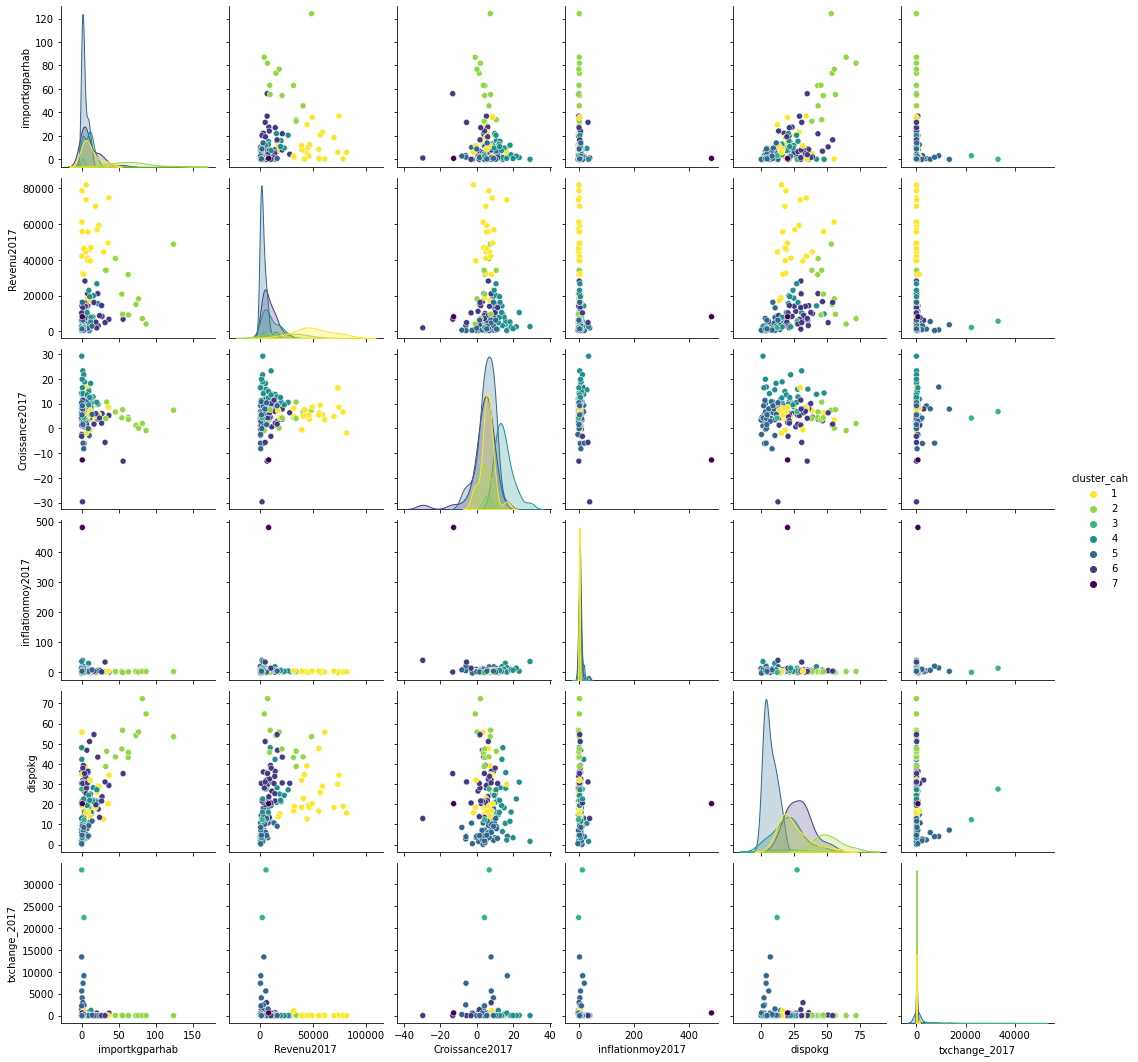

In [258]:
sns.pairplot(cahfinal, hue = 'cluster_cah', palette='viridis_r')

<a id='section5'></a>
# <big><font face="'Montserrat'" color="#0c4da2">KMEANS</font></big>

In [259]:
from sklearn import cluster
groupe = cluster.KMeans(n_clusters=5)
groupe.fit(T)

KMeans(n_clusters=5)

C:\Users\cedric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


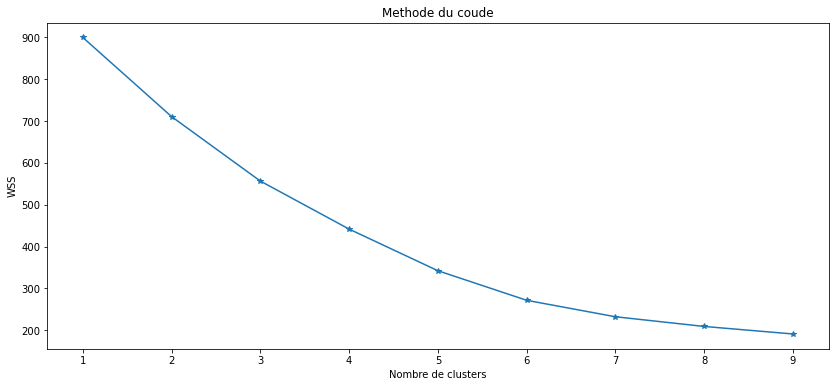

In [260]:
wss = []
for i in range (1,10):
    from sklearn.cluster import KMeans
    k_mean = KMeans(n_clusters = i)
    k_mean.fit(T)
    wss.append(k_mean.inertia_)
plt.figure(figsize=(14,6))    
plt.plot([1,2,3,4,5,6,7,8,9], wss, marker='*')
plt.xlabel('Nombre de clusters')
plt.ylabel ('WSS')
plt.title('Methode du coude')
plt.show()
#methode du coude pour la determination du nombre de clusters ici 5

In [261]:
import sklearn.metrics as metrics
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(T).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(T,labels,metric="euclidean",sample_size=1000,random_state=200)))
#score du coefficient de silhouette    

Silhouette score for k(clusters) = 2 is 0.33821019400574387
Silhouette score for k(clusters) = 3 is 0.35305217903577246
Silhouette score for k(clusters) = 4 is 0.3474566605062335
Silhouette score for k(clusters) = 5 is 0.3775060632900848
Silhouette score for k(clusters) = 6 is 0.2706942808333632
Silhouette score for k(clusters) = 7 is 0.2734981451487474
Silhouette score for k(clusters) = 8 is 0.30259421685283183
Silhouette score for k(clusters) = 9 is 0.2564371819116323


In [262]:
centroidkmeans = groupe.cluster_centers_
centroidkmeans
#coordonnées des centroids de chaque groupe

array([[ 1.00817090e-01,  1.68418317e+00, -8.85883928e-02,
        -1.52714960e-01,  5.43805547e-01, -2.09572018e-01],
       [-3.03421317e-01, -4.68571251e-01,  1.17659618e-01,
        -5.24280043e-02, -3.35419697e-01, -9.57003142e-02],
       [ 3.14996853e+00,  1.25345071e-01, -6.94706362e-01,
        -1.69186514e-01,  2.04586707e+00, -2.20049120e-01],
       [-5.98168906e-01, -3.53562152e-01, -2.85099638e+00,
         1.20430510e+01, -7.95292183e-02, -5.32552098e-02],
       [-5.87789864e-01, -5.85610309e-01, -5.40258376e-03,
        -7.07895350e-02, -3.79606654e-01,  6.22838009e+00]])

In [263]:
groupekmeans = groupe.labels_
groupekmeans
#appartenance des pays vs groupe

array([1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1])

In [264]:
np.unique(groupe.labels_, return_counts=True)
#numero des groupes vs nombres de pays

(array([0, 1, 2, 3, 4]), array([ 30, 106,  10,   1,   3], dtype=int64))

In [265]:
kmeanfinal = final.copy()

In [266]:
kmeanfinal['groupe.labels_'] = groupe.labels_.tolist()
kmeanfinal.head()
#rajout au dataframe la correspondance du groupe

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03,1
Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33,1
Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10,1
Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97,1
Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89,0


[Text(0.5, 0, 'groupe'),
 Text(0, 0.5, 'import'),
 Text(0.5, 1.0, 'Représentation entre le groupe  et l_import')]

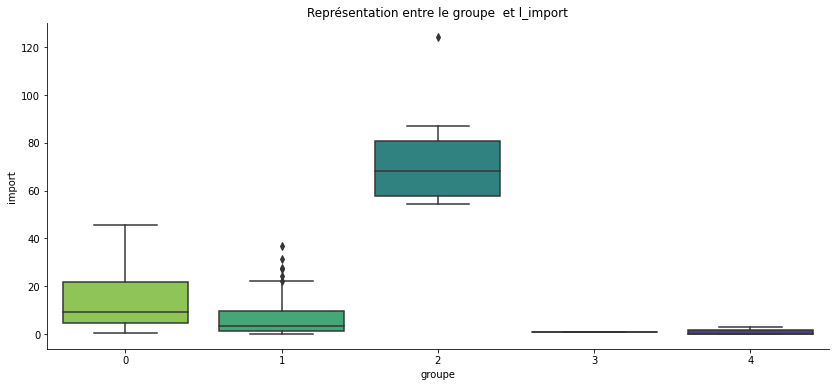

In [267]:
plt.figure(figsize=(14,6))
boxplot1 = sns.boxplot(x='groupe.labels_', y = 'importkgparhab', data= kmeanfinal, palette= 'viridis_r')
sns.despine(top= True, right= True)
boxplot1.set(xlabel='groupe',ylabel='import', title='Représentation entre le groupe  et l_import')


[Text(0.5, 0, 'grpe'),
 Text(0, 0.5, 'Revenu'),
 Text(0.5, 1.0, 'Représentation entre le groupe  et le revenu')]

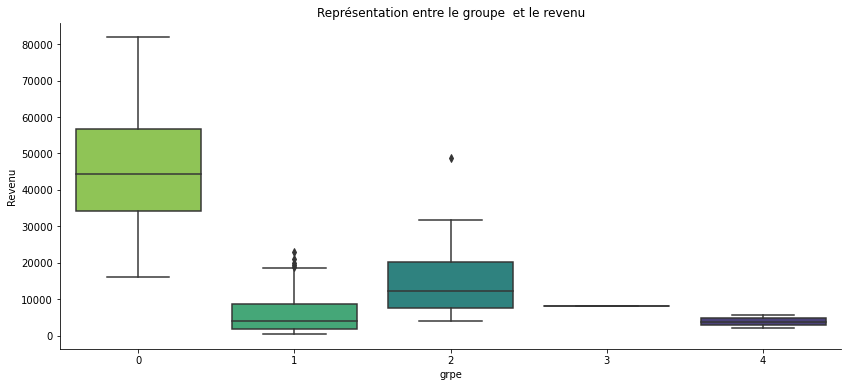

In [268]:
plt.figure(figsize=(14,6))
boxplot2 = sns.boxplot(x='groupe.labels_', y = 'Revenu2017', data= kmeanfinal, palette= 'viridis_r')
sns.despine(top= True, right= True)
boxplot2.set(xlabel='grpe',ylabel='Revenu', title='Représentation entre le groupe  et le revenu')

[Text(0.5, 0, 'grpe'),
 Text(0, 0.5, 'Croissance'),
 Text(0.5, 1.0, 'Représentation entre le groupe  et la croissance')]

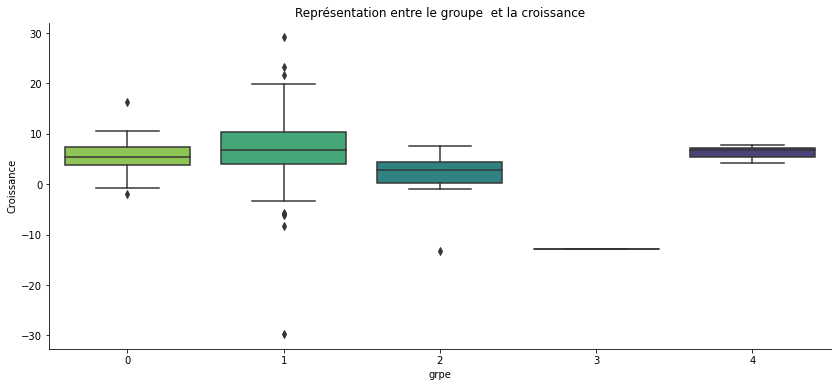

In [269]:
plt.figure(figsize=(14,6))
boxplot3 = sns.boxplot(x='groupe.labels_', y = 'Croissance2017', data= kmeanfinal, palette= 'viridis_r')
sns.despine(top= True, right= True)
boxplot3.set(xlabel='grpe',ylabel='Croissance', title='Représentation entre le groupe  et la croissance')

[Text(0.5, 0, 'grpe'),
 Text(0, 0.5, 'Inflation moyenne'),
 Text(0.5, 1.0, 'Représentation entre le groupe et l_inflation moyenne')]

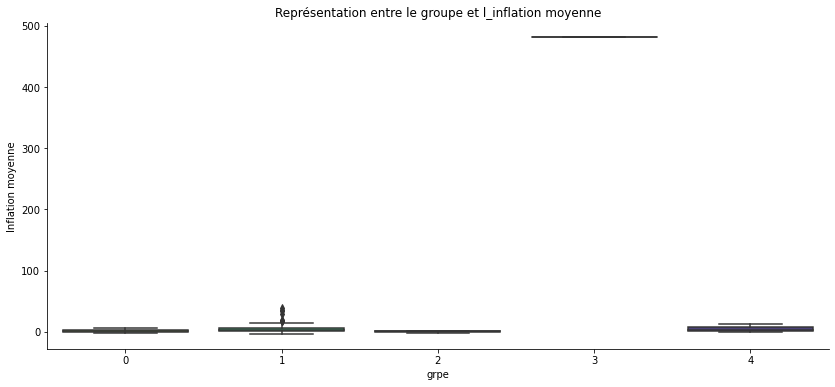

In [270]:
plt.figure(figsize=(14,6))
boxplot4 = sns.boxplot(x='groupe.labels_', y = 'inflationmoy2017', data= kmeanfinal, palette= 'viridis_r')
sns.despine(top= True, right= True)
boxplot4.set(xlabel='grpe',ylabel='Inflation moyenne', title='Représentation entre le groupe et l_inflation moyenne')

[Text(0.5, 0, 'grpe'),
 Text(0, 0.5, 'disponibilité'),
 Text(0.5, 1.0, 'Représentation entre le groupe et la disponibilité')]

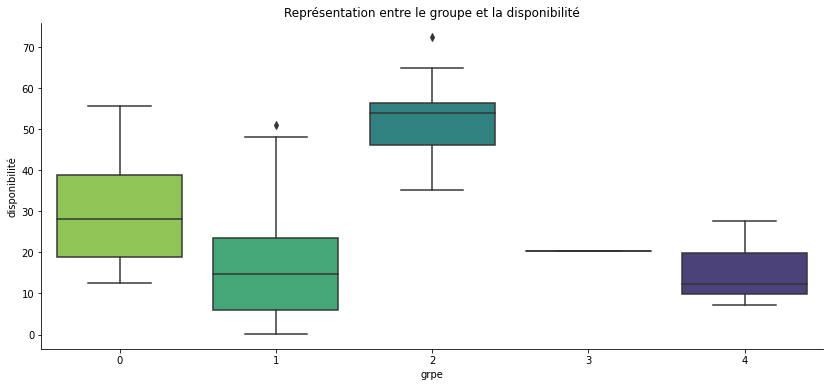

In [271]:
plt.figure(figsize=(14,6))
boxplot4 = sns.boxplot(x='groupe.labels_', y = 'dispokg', data= kmeanfinal, palette= 'viridis_r')
sns.despine(top= True, right= True)
boxplot4.set(xlabel='grpe',ylabel='disponibilité', title='Représentation entre le groupe et la disponibilité')

In [272]:
gk0 = kmeanfinal[kmeanfinal['groupe.labels_'] ==  0]
gk0

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Allemagne,10.186501,45609.06,5.49,2.76,19.47,0.89,0
Arabie saoudite,21.811912,21125.66,3.74,-0.82,43.36,3.75,0
Australie,0.650813,55801.63,6.23,0.31,47.65,1.30,0
Autriche,12.471795,46862.80,3.64,2.37,18.20,0.89,0
Barbade,6.987339,16610.29,3.01,6.26,46.78,2.00,0
Belgique,29.597851,44423.61,5.02,1.27,12.65,0.89,0
Canada,4.954795,44394.73,7.00,-0.98,39.02,1.30,0
Chine - RAS de Macao,36.942747,74554.76,8.52,1.54,34.47,8.03,0
Danemark,23.201961,59207.05,5.40,2.80,28.98,6.60,0


In [273]:
gk0.index

Index(['Allemagne', 'Arabie saoudite', 'Australie', 'Autriche', 'Barbade',
       'Belgique', 'Canada', 'Chine - RAS de Macao', 'Danemark',
       'Émirats arabes unis', 'Espagne', 'États-Unis d'Amérique', 'Finlande',
       'France', 'Irlande', 'Islande', 'Italie', 'Japon', 'Koweït',
       'Luxembourg', 'Malte', 'Norvège', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Pays-Bas', 'République de Corée',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Suède',
       'Suisse', 'Trinité-et-Tobago'],
      dtype='object', name='Zone')

In [274]:
gk0.describe(include='all')

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,14.396585,46262.423333,5.651333,1.318667,29.835333,50.652333,0.0
std,12.934162,17704.880363,3.638382,1.832904,12.597616,206.479353,0.0
min,0.212674,16207.480000,-1.910000,-2.410000,12.650000,0.300000,0.0
25%,4.534700,34133.832500,3.792500,0.100000,18.790000,0.890000,0.0
50%,9.333578,44409.170000,5.400000,1.345000,28.075000,1.150000,0.0
75%,21.565866,56588.507500,7.390000,2.587500,38.942500,6.735000,0.0
max,45.640427,81826.490000,16.360000,6.260000,55.680000,1130.420000,0.0


In [275]:
gk1 = kmeanfinal[kmeanfinal['groupe.labels_'] ==  1]
gk1

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Afghanistan,0.798984,519.40,0.95,6.96,1.53,68.03,1
Afrique du Sud,9.016001,5938.28,15.83,6.91,35.69,13.33,1
Albanie,13.175372,4525.23,8.36,4.14,16.36,119.10,1
Algérie,0.048322,4056.01,3.53,5.04,6.38,110.97,1
Angola,9.290075,3841.27,15.54,28.91,10.56,165.92,1
...,...,...,...,...,...,...,...
Uruguay,0.872945,16291.33,9.10,2.84,9.12,28.68,1
Vanuatu,14.010017,2975.33,5.62,6.88,11.66,107.82,1
Yémen,2.802246,740.99,-8.27,7.16,8.53,250.25,1


In [276]:
gk1.index

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola',
       'Argentine', 'Arménie', 'Azerbaïdjan', 'Bélarus', 'Bénin',
       ...
       'Timor-Leste', 'Togo', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay',
       'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe'],
      dtype='object', name='Zone', length=106)

In [277]:
gk1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   importkgparhab    106 non-null    float64
 1   Revenu2017        106 non-null    float64
 2   Croissance2017    106 non-null    float64
 3   inflationmoy2017  106 non-null    float64
 4   dispokg           106 non-null    float64
 5   txchange_2017     106 non-null    float64
 6   groupe.labels_    106 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 6.6+ KB


In [278]:
gk2 = kmeanfinal[kmeanfinal['groupe.labels_'] ==  2]
gk2

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Antigua-et-Barbuda,73.355270,15106.49,1.22,1.87,54.10,2.70,2
Bahamas,62.867546,31747.90,4.43,-0.12,43.17,1.00,2
Chine - RAS de Hong-Kong,124.139068,48734.39,7.33,1.13,53.51,7.79,2
Dominique,55.976938,6794.82,-13.27,-0.22,35.19,2.70,2
Grenade,63.134730,9211.28,3.56,0.54,45.70,2.70,2
Polynésie française,54.327748,20852.10,4.23,1.82,47.40,105.63,2
Sainte-Lucie,55.262663,9632.92,7.51,-1.46,56.69,2.70,2
Saint-Kitts-et-Nevis,76.856566,18196.78,0.05,-0.13,55.77,2.70,2
Saint-Vincent-et-les Grenadines,81.947062,7161.71,1.91,1.90,72.31,2.70,2


In [279]:
gk2.index

Index(['Antigua-et-Barbuda', 'Bahamas', 'Chine - RAS de Hong-Kong',
       'Dominique', 'Grenade', 'Polynésie française', 'Sainte-Lucie',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Samoa'],
      dtype='object', name='Zone')

In [280]:
gk2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Antigua-et-Barbuda to Samoa
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   importkgparhab    10 non-null     float64
 1   Revenu2017        10 non-null     float64
 2   Croissance2017    10 non-null     float64
 3   inflationmoy2017  10 non-null     float64
 4   dispokg           10 non-null     float64
 5   txchange_2017     10 non-null     float64
 6   groupe.labels_    10 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 640.0+ bytes


In [281]:
gk3 = kmeanfinal[kmeanfinal['groupe.labels_'] ==  3]
gk3

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Venezuela (République bolivarienne du),0.850268,8209.28,-12.79,480.86,20.28,607.69,3


In [282]:
gk3.index

Index(['Venezuela (République bolivarienne du)'], dtype='object', name='Zone')

In [283]:
gk3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Venezuela (République bolivarienne du) to Venezuela (République bolivarienne du)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   importkgparhab    1 non-null      float64
 1   Revenu2017        1 non-null      float64
 2   Croissance2017    1 non-null      float64
 3   inflationmoy2017  1 non-null      float64
 4   dispokg           1 non-null      float64
 5   txchange_2017     1 non-null      float64
 6   groupe.labels_    1 non-null      int64  
dtypes: float64(6), int64(1)
memory usage: 64.0+ bytes


In [284]:
gk4 = kmeanfinal[kmeanfinal['groupe.labels_'] ==  4]
gk4

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
Zone,,,,,,,
Indonésie,0.003779,3715.98,7.75,2.14,7.19,13380.83,4
Iran (République islamique d'),0.074374,5724.70,6.74,12.55,27.52,33226.30,4
Viet Nam,3.076089,2187.26,4.13,-1.07,12.33,22370.09,4


In [285]:
gk4.index

Index(['Indonésie', 'Iran (République islamique d')', 'Viet Nam'], dtype='object', name='Zone')

In [286]:
gk4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Indonésie to Viet Nam
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   importkgparhab    3 non-null      float64
 1   Revenu2017        3 non-null      float64
 2   Croissance2017    3 non-null      float64
 3   inflationmoy2017  3 non-null      float64
 4   dispokg           3 non-null      float64
 5   txchange_2017     3 non-null      float64
 6   groupe.labels_    3 non-null      int64  
dtypes: float64(6), int64(1)
memory usage: 192.0+ bytes


C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cedric\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

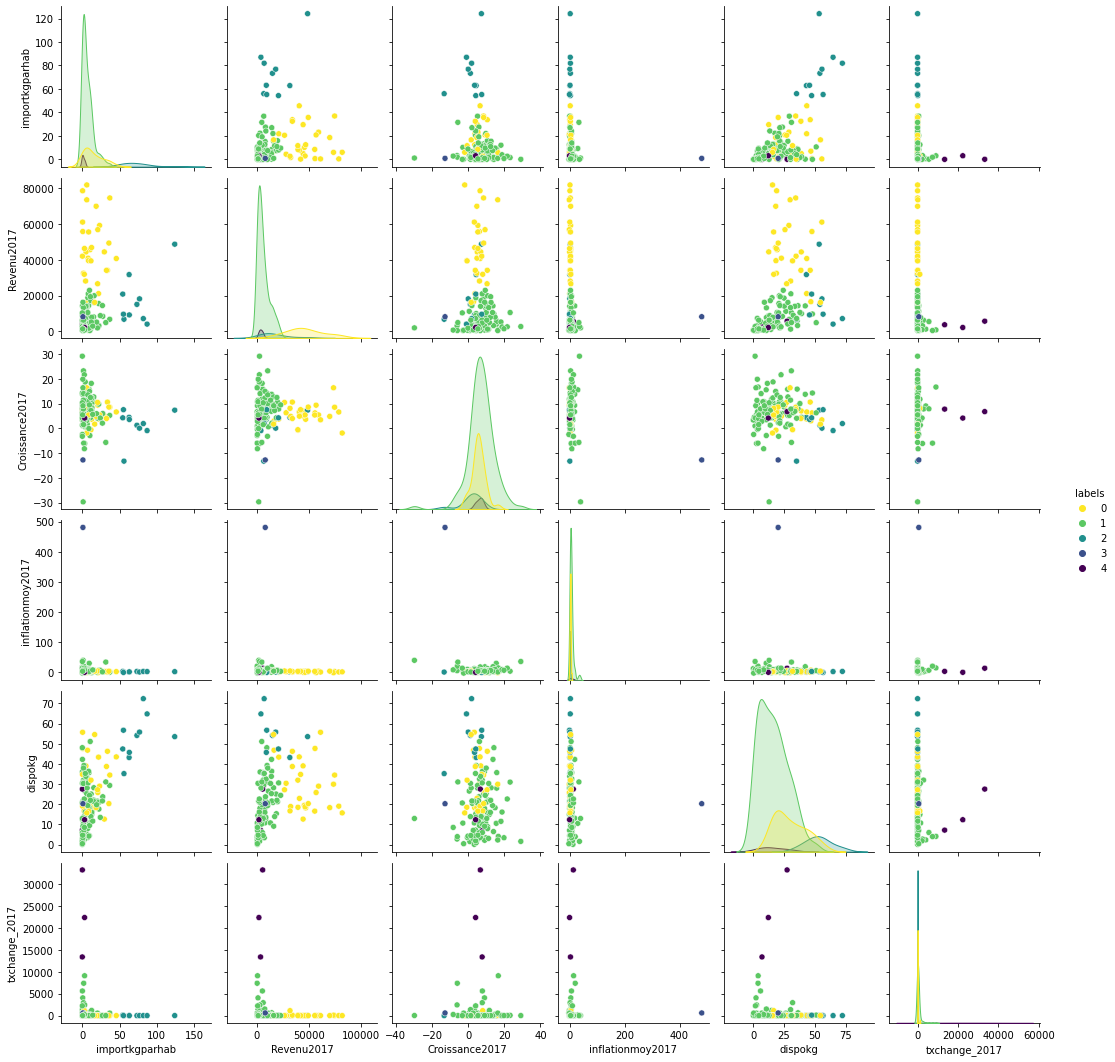

In [287]:
B = final.copy()
B['labels']= groupe.labels_

sns.pairplot(B, hue = 'labels', palette='viridis_r')

In [288]:
print(np.mean(T,axis=0))

importkgparhab      3.996803e-17
Revenu2017          1.480297e-18
Croissance2017     -4.616677e-17
inflationmoy2017   -1.480297e-18
dispokg             2.072416e-17
txchange_2017       5.828671e-17
dtype: float64


In [289]:
print(np.std(T,axis=0,ddof=0))

importkgparhab      1.0
Revenu2017          1.0
Croissance2017      1.0
inflationmoy2017    1.0
dispokg             1.0
txchange_2017       1.0
dtype: float64


<a id='section6'></a>
# <big><font face="'Montserrat'" color="#0c4da2">ANALYSE COMPOSANTES PRINCIPLES </font></big>

In [290]:
print(np.mean(T,axis=0))

importkgparhab      3.996803e-17
Revenu2017          1.480297e-18
Croissance2017     -4.616677e-17
inflationmoy2017   -1.480297e-18
dispokg             2.072416e-17
txchange_2017       5.828671e-17
dtype: float64


In [291]:
#écart-type
print(np.std(T,axis=0,ddof=0))

importkgparhab      1.0
Revenu2017          1.0
Croissance2017      1.0
inflationmoy2017    1.0
dispokg             1.0
txchange_2017       1.0
dtype: float64


In [292]:
#classe pour l'ACP
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')

In [293]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [294]:
#calculs
coord = acp.fit_transform(T)
#nombre de composantes calculées
print(acp.n_components_) # 6


6


In [295]:
#variance expliquée
print(acp.explained_variance_)

[1.87266155 1.26005569 0.97743826 0.82305706 0.73915069 0.3679052 ]


In [296]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.86017714 1.25165532 0.970922   0.81757002 0.73422302 0.3654525 ]


In [297]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[1.86017714 1.25165532 0.970922   0.81757002 0.73422302 0.3654525 ]


In [298]:
#proportion de variance expliquée / le poids de chaque variable
print(acp.explained_variance_ratio_)

[0.31002952 0.20860922 0.16182033 0.13626167 0.1223705  0.06090875]


In [299]:
X_trans=acp.transform(T)


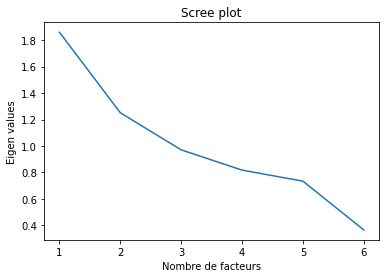

In [300]:
#eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Nombre de facteurs")
plt.show()


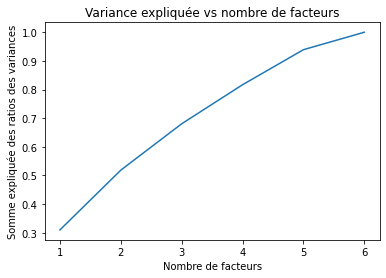

In [301]:
#cumul de variance expliquée/ le poids de chaque variable additionnée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée vs nombre de facteurs")
plt.ylabel("Somme expliquée des ratios des variances")
plt.xlabel("Nombre de facteurs")
plt.show()


In [302]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.59688571  0.43327762 -0.09292392 -0.09611669  0.62439421 -0.21967374]
 [ 0.10303977 -0.14205069 -0.70972552  0.67839616  0.02309752  0.0688422 ]
 [ 0.20759584 -0.14522846 -0.03831244 -0.20246265  0.19111958  0.9256495 ]
 [-0.35564453  0.78413202  0.17700599  0.37398078 -0.01634735  0.29528626]
 [ 0.15906593 -0.35048998  0.65909702  0.58182515  0.28087505  0.00588366]
 [ 0.66198884  0.18246796  0.14299297  0.10567392 -0.70278991  0.05430107]]


In [303]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [304]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 0.81408234  0.11527822  0.20455534 -0.32157228  0.13629853  0.40018991]
 [ 0.59094003 -0.15892263 -0.14310141  0.70900886 -0.3003237   0.11030675]
 [-0.12673736 -0.79402248 -0.0377513   0.16004807  0.56475924  0.08644306]
 [-0.13109193  0.758972   -0.19949733  0.33815184  0.49854744  0.0638827 ]
 [ 0.85160071  0.02584091  0.1883204  -0.01478121  0.24067289 -0.42485524]
 [-0.29960931  0.07701886  0.9120922   0.26699659  0.00504152  0.03282644]]


In [305]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':T.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0    importkgparhab  0.814082  0.115278
1        Revenu2017  0.590940 -0.158923
2    Croissance2017 -0.126737 -0.794022
3  inflationmoy2017 -0.131092  0.758972
4           dispokg  0.851601  0.025841
5     txchange_2017 -0.299609  0.077019


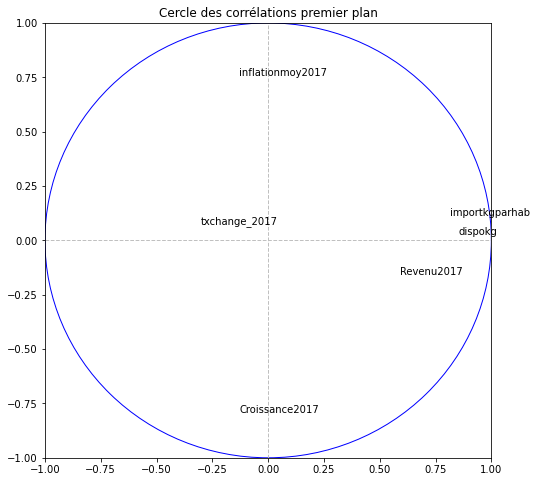

In [306]:
#cercle des corrélations 1 er plan
fig, axes = plt.subplots(figsize=(8,8))
plt.title("Cercle des corrélations premier plan")
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(T.columns[j],(corvar[j,0],corvar[j,1]))


plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

#### Qualité de représentation des variables (COS2) :

In [307]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':T.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                 id    COS2_1    COS2_2
0    importkgparhab  0.662730  0.013289
1        Revenu2017  0.349210  0.025256
2    Croissance2017  0.016062  0.630472
3  inflationmoy2017  0.017185  0.576039
4           dispokg  0.725224  0.000668
5     txchange_2017  0.089766  0.005932


In [308]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':T.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                 id     CTR_1     CTR_2
0    importkgparhab  0.356273  0.010617
1        Revenu2017  0.187729  0.020178
2    Croissance2017  0.008635  0.503710
3  inflationmoy2017  0.009238  0.460221
4           dispokg  0.389868  0.000533
5     txchange_2017  0.048257  0.004739


- Les variables importkgparhab et dispokg   sont les variables qui contribuent majoritairement à F1(79%).

- La variable inflationmoy2017  et Croissance2017 , contribue à 96% à F2.

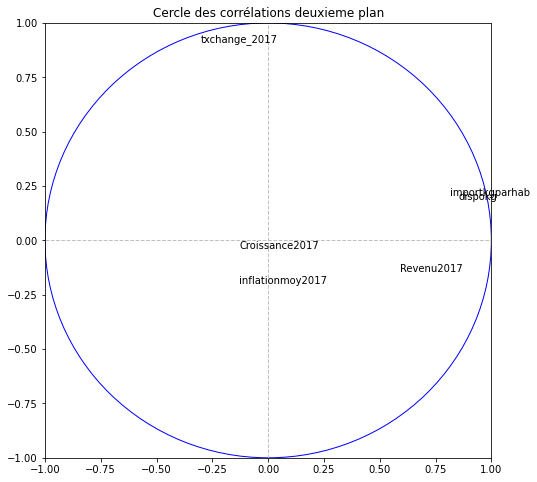

In [309]:
#cercle des corrélations 2 eme plan
fig, axes = plt.subplots(figsize=(8,8))
plt.title("Cercle des corrélations deuxieme plan")
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(T.columns[j],(corvar[j,0],corvar[j,2]))


plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

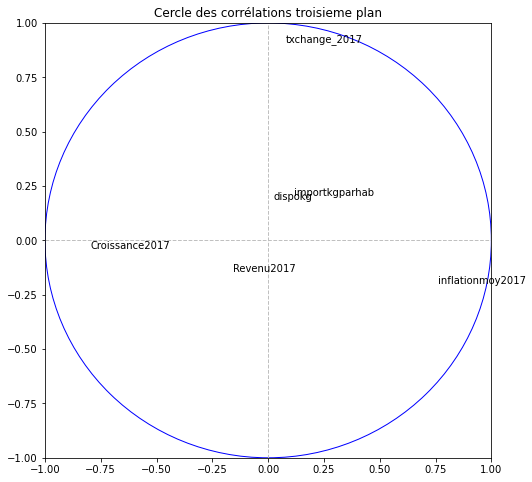

In [310]:
#cercle des corrélations 3 eme plan
fig, axes = plt.subplots(figsize=(8,8))
plt.title("Cercle des corrélations troisieme plan")
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(T.columns[j],(corvar[j,1],corvar[j,2]))


plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()



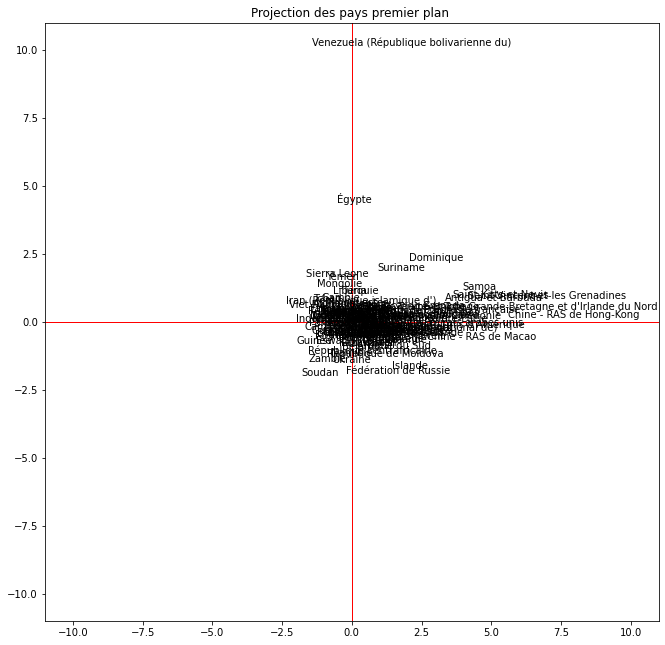

In [311]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des pays premier plan ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

for i in range(n):
                 plt.annotate(T.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

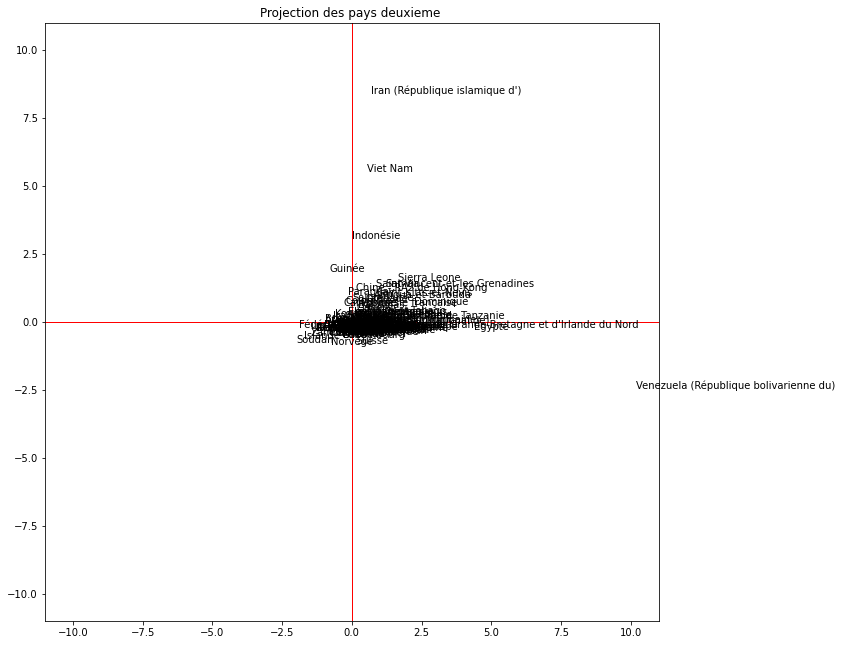

In [312]:
#positionnement des individus dans le deuxieme plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des pays deuxieme ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

for i in range(n):
                 plt.annotate(T.index[i],(coord[i,1],coord[i,2]))

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

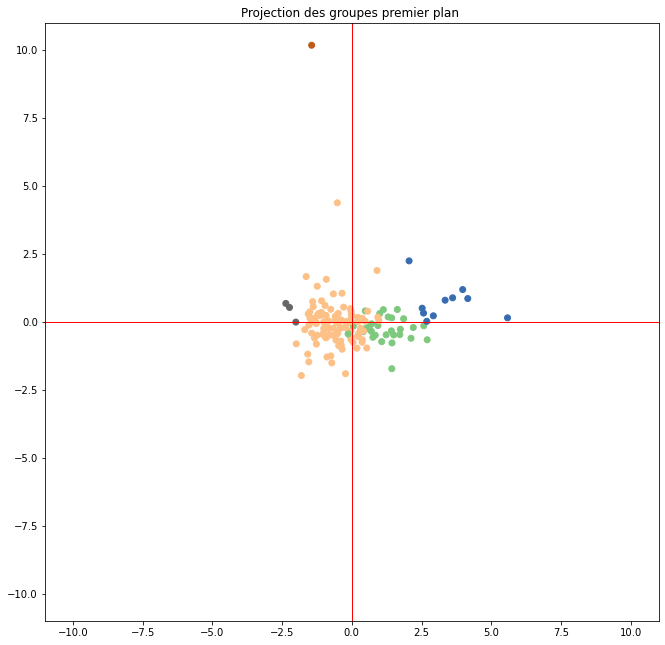

In [313]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des groupes premier plan ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

plt.scatter(X_trans[:,0],X_trans [:,1], cmap="Accent",c=groupe.labels_)


plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

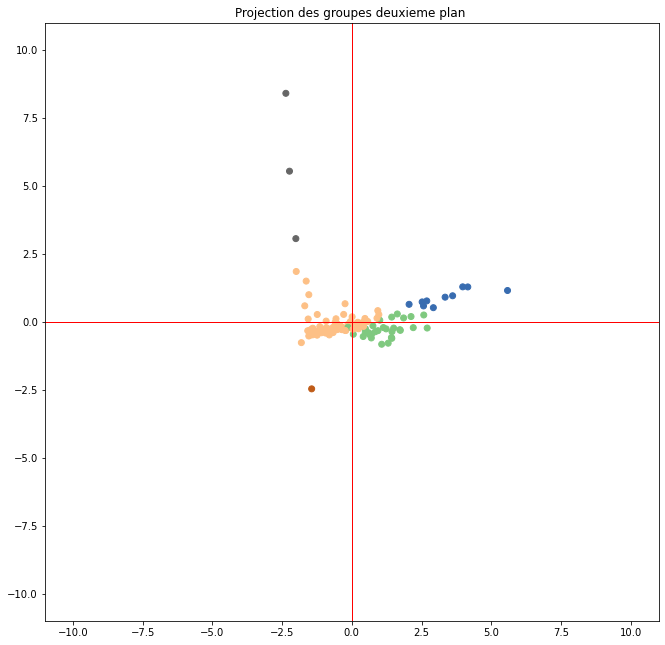

In [314]:
#positionnement des individus dans le deuxieme plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des groupes deuxieme plan ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

plt.scatter(X_trans[:,0],X_trans [:,2],cmap="Accent", c=groupe.labels_)

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

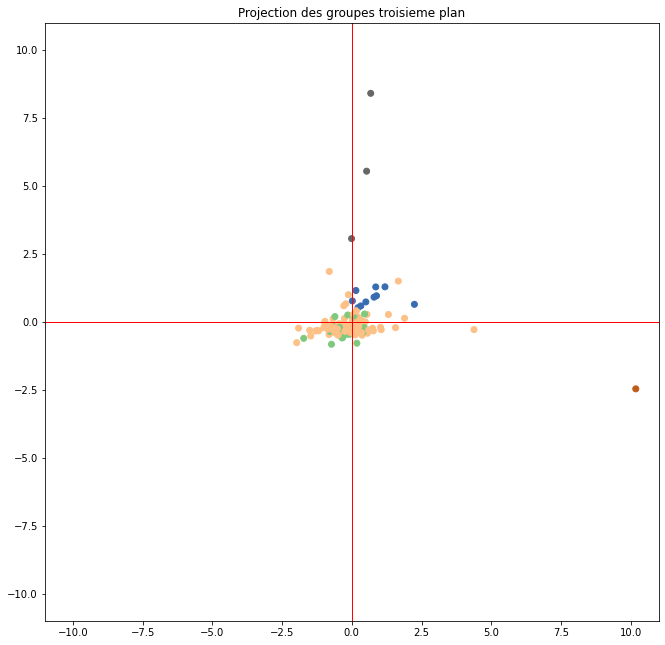

In [315]:
#positionnement des individus dans le troisieme plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des groupes troisieme plan")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

plt.scatter(X_trans[:,1],X_trans [:,2],cmap="Accent", c=groupe.labels_)

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

In [316]:
gl = kmeanfinal[['groupe.labels_']]
gl

,groupe.labels_
Zone,
Afghanistan,1
Afrique du Sud,1
Albanie,1
Algérie,1
Allemagne,0
...,...
Venezuela (République bolivarienne du),3
Viet Nam,4
Yémen,1


In [317]:
resusu = pd.concat([T,gl], axis =1).reset_index(drop=True)
resusu

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
0,-0.600815,-0.765355,-0.792822,-0.009244,-1.302671,-0.204695,1
1,-0.176819,-0.475174,1.436119,-0.010515,0.925730,-0.220045,1
2,0.037803,-0.550843,0.317155,-0.080962,-0.335247,-0.190364,1
3,-0.639549,-0.575970,-0.406352,-0.058073,-0.986285,-0.192646,1
4,-0.116422,1.649196,-0.112755,-0.116059,-0.132369,-0.223536,0
...,...,...,...,...,...,...,...
145,-0.598169,-0.353562,-2.850996,12.043051,-0.079529,-0.053255,3
146,-0.483317,-0.676041,-0.316476,-0.213464,-0.598141,6.053745,4
147,-0.497447,-0.753489,-2.173926,-0.004157,-0.846031,-0.153561,1
148,-0.605303,-0.713557,2.033798,-0.039508,-1.179378,-0.221115,1


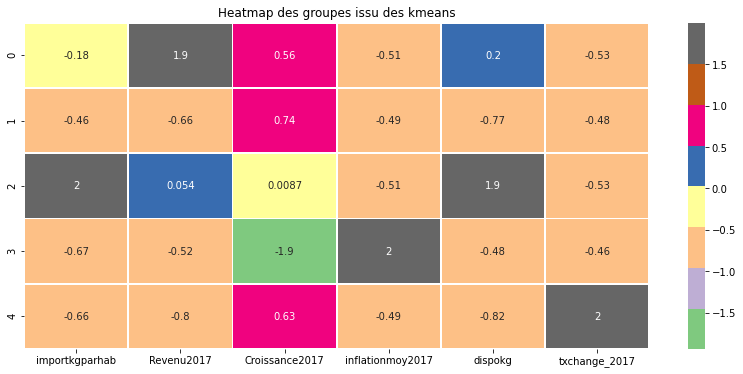

In [318]:
plt.figure(figsize=(14,6))
sns.heatmap(sc.fit_transform(centroidkmeans),linewidths=.8, cmap='Accent',annot= True,xticklabels=final1.columns.tolist())
plt.title("Heatmap des groupes issu des kmeans")

plt.show()
#heatmap des groupes vs methode des kmeans

In [319]:
coord_kmeans = acp.transform(centroidkmeans)
coord_kmeans
# coordonnées des centroids 

array([[ 1.19839209e+00, -2.71445851e-01, -2.79407355e-01,
         1.14120024e+00, -5.69986149e-01, -4.83172905e-02],
       [-5.78434740e-01, -9.81121681e-02, -1.41522455e-01,
        -2.81067962e-01,  6.82366137e-02, -4.45435891e-02],
       [ 3.34106347e+00,  7.17147839e-01,  8.83903432e-01,
        -1.30664367e+00,  4.74142945e-01,  5.41135107e-01],
       [-1.44080034e+00,  1.01764699e+01, -2.46636470e+00,
         3.92029677e+00,  5.13398736e+00,  4.57469568e-01],
       [-2.20250488e+00,  3.98439027e-01,  5.67031044e+00,
         1.56777886e+00, -2.97113374e-03,  1.00772843e-01]])

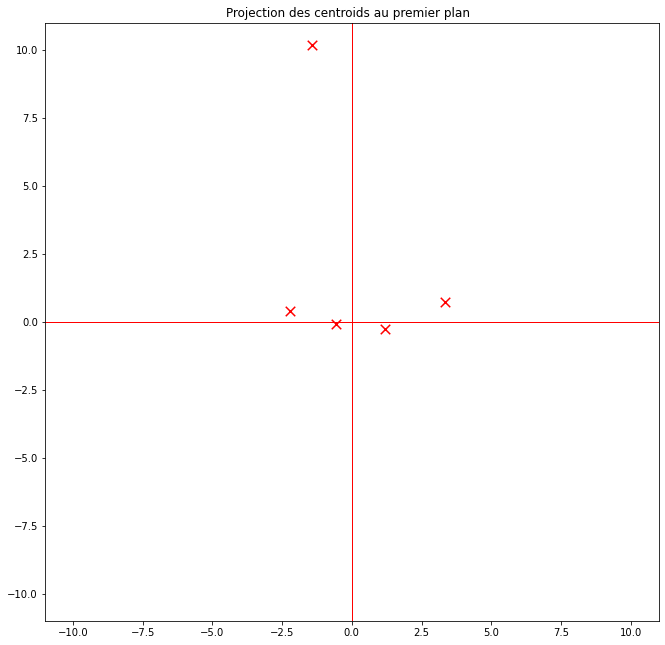

In [320]:
#projection des centroids 1 er plan 
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des centroids au premier plan  ")
axes.set_xlim(-11,11)
axes.set_ylim(-11,11)

plt.scatter(coord_kmeans[:,0], coord_kmeans[:,1], marker='x', s=90, color = 'r')

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

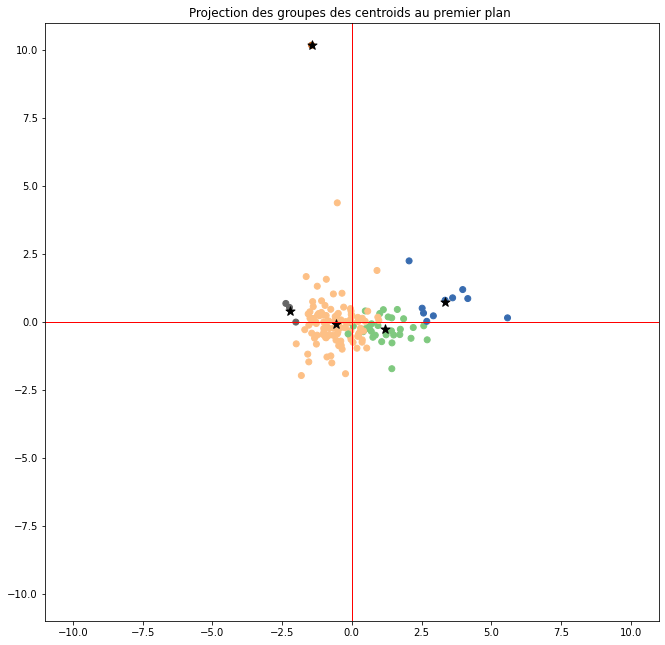

In [321]:
#projection des centroids avec les groupes  1 er plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des groupes des centroids au premier plan ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

plt.scatter(X_trans[:,0],X_trans [:,1], cmap="Accent",c=groupe.labels_)
plt.scatter(coord_kmeans[:,0], coord_kmeans[:,1], marker='*', s=90, color = 'k')

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

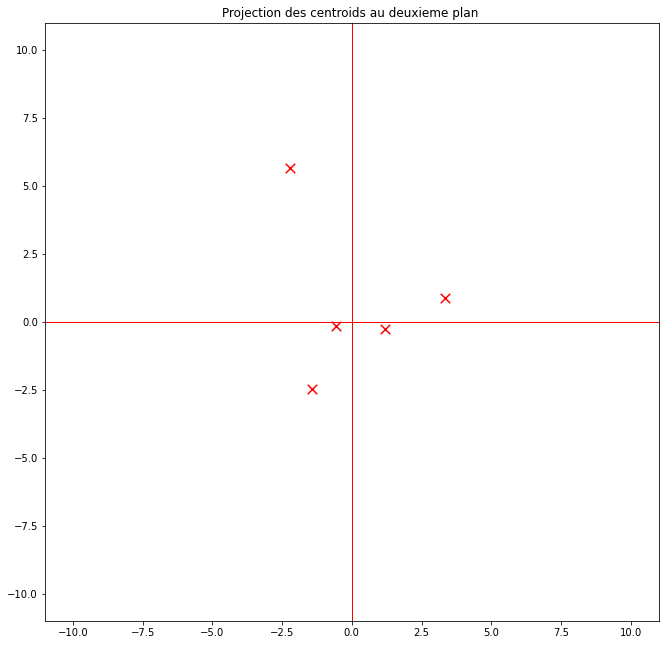

In [322]:
#projection des centroids au 2 eme plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des centroids au deuxieme plan ")
axes.set_xlim(-11,11)
axes.set_ylim(-11,11)

plt.scatter(coord_kmeans[:,0], coord_kmeans[:,2], marker='x', s=90, color = 'r')

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()

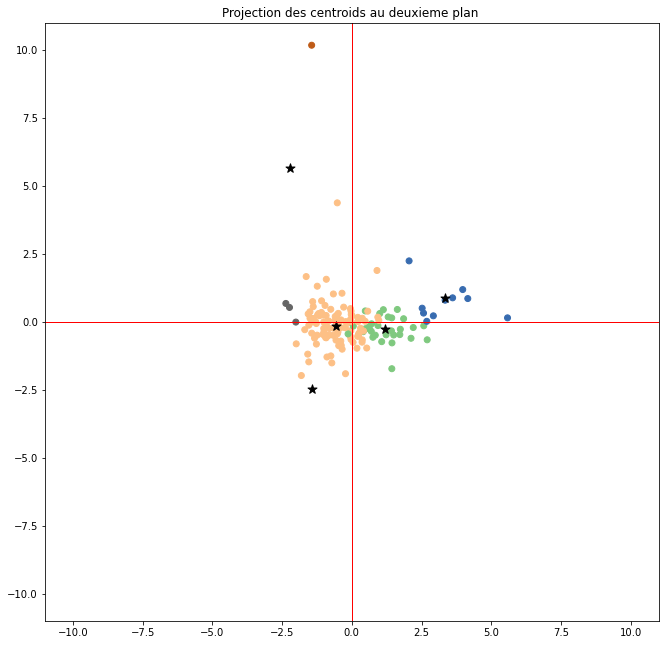

In [323]:
#projection des centroids avec les groupes  2 eme plan
fig, axes = plt.subplots(figsize=(11,11))
plt.title("Projection des centroids au deuxieme plan ")
axes.set_xlim(-11,11) 
axes.set_ylim(-11,11) 

plt.scatter(X_trans[:,0],X_trans [:,1], cmap="Accent",c=groupe.labels_)
plt.scatter(coord_kmeans[:,0], coord_kmeans[:,2], marker='*', s=90, color = 'k')

plt.plot([-11,11],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-11,11],color='red',linestyle='-',linewidth=1)

plt.show()


<a id='section7'></a>
# <big><font face="'Montserrat'" color="#0c4da2">COMPARAISON DENDROGRAMME VS KMEANS </font></big>

In [324]:
explicationcah.size()

1    24
2    12
3     2
4    26
5    48
6    37
7     1
dtype: int64

In [325]:
R1 = explicationcah.mean().round(2)
R1
#g1 groupe ayant une bonne importante importation un bon revenu avec une croissance sup a 5%  et une dispo sup aux autres groupes a cibler prioritairement
#g2  groupe qui importe peu  avec un revenu moyen moins important un bonne croissance une dispo moins importante avec un fort taux de change a cibler dans un second temps en terme de strategie commerciale donc prévoir certains investissement vs cout
#g3 un pays " a part "  peu d importation decroissant avec une tres forte inflation a ne pas cibler a ce jour

,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,cluster_cah
1,11.20,50257.76,5.61,1.18,24.73,58.23,1
2,65.90,22811.03,4.20,0.77,51.82,20.01,2
3,1.58,3955.98,5.44,5.74,19.92,27798.20,3
4,8.47,9658.05,14.78,7.07,20.58,113.69,4
5,3.79,3133.17,5.20,4.84,7.08,1068.20,5
6,10.83,8762.73,3.23,4.12,29.04,204.02,6
7,0.85,8209.28,-12.79,480.86,20.28,607.69,7


In [326]:
explicationkmeans = kmeanfinal.groupby( groupe.labels_)

In [327]:
explicationkmeans.size()

0     30
1    106
2     10
3      1
4      3
dtype: int64

In [328]:
R2= explicationkmeans.mean().round(2)
R2


,importkgparhab,Revenu2017,Croissance2017,inflationmoy2017,dispokg,txchange_2017,groupe.labels_
0,14.40,46262.42,5.65,1.32,29.84,50.65,0
1,6.56,6061.58,7.03,5.26,16.36,456.44,1
2,73.49,17152.46,1.60,0.67,52.86,13.32,2
3,0.85,8209.28,-12.79,480.86,20.28,607.69,3
4,1.05,3875.98,6.21,4.54,15.68,22992.41,4


In [329]:
resultat = pd.concat([kmeanfinal,cahfinal], axis =1)
resultat = resultat [['groupe.labels_', 'cluster_cah']].reset_index()
resultat

,Zone,groupe.labels_,cluster_cah
0,Afghanistan,1,5
1,Afrique du Sud,1,4
2,Albanie,1,5
3,Algérie,1,5
4,Allemagne,0,1
...,...,...,...
145,Venezuela (République bolivarienne du),3,7
146,Viet Nam,4,3
147,Yémen,1,5
148,Zambie,1,4


In [330]:
resultatfinal = resultat[resultat[['groupe.labels_','cluster_cah']].nunique(axis=1)==1]
resultatfinal

,Zone,groupe.labels_,cluster_cah
6,Antigua-et-Barbuda,2,2
13,Bahamas,2,2
27,Chine - RAS de Hong-Kong,2,2
56,Grèce,1,1
57,Grenade,2,2
111,Polynésie française,2,2
120,Sainte-Lucie,2,2
121,Saint-Kitts-et-Nevis,2,2
122,Saint-Vincent-et-les Grenadines,2,2
123,Samoa,2,2


<a id='section8'></a>
# <big><font face="'Montserrat'" color="#0c4da2">RESULTATS</font></big>

In [331]:
importclean['Tonne']= importclean['importkg'] / 1000
importcleantonne = importclean[['Zone','Tonne']]
importcleantonne
#importation par pays 

,Zone,Tonne
652,Afghanistan,29000.0
1705,Afrique du Sud,514000.0
2714,Albanie,38000.0
3773,Algérie,2000.0
4874,Allemagne,842000.0
...,...,...
172329,Venezuela (République bolivarienne du),25000.0
173388,Viet Nam,291000.0
174319,Yémen,78000.0
175362,Zambie,12000.0


In [332]:
potentielgk0 = gk0.merge(importcleantonne, on="Zone")
potentielgk0= potentielgk0[['Zone','Tonne' ]]
potentielgk0
#importation du groupe 0 de chaque pays

,Zone,Tonne
0,Allemagne,842000.0
1,Arabie saoudite,722000.0
2,Australie,16000.0
3,Autriche,110000.0
4,Barbade,2000.0
5,Belgique,338000.0
6,Canada,182000.0
7,Chine - RAS de Macao,23000.0
8,Danemark,133000.0
9,Émirats arabes unis,433000.0


In [333]:
demandegk0 = potentielgk0['Tonne'].sum()
demandegk0
#calcul de l'importation du groupe 0

6769000.0

In [334]:
potentielgk1 = gk1.merge(importcleantonne, on="Zone")
potentielgk1= potentielgk1[['Zone','Tonne' ]]
potentielgk1
#importation du groupe 1 de chaque pays

,Zone,Tonne
0,Afghanistan,29000.0
1,Afrique du Sud,514000.0
2,Albanie,38000.0
3,Algérie,2000.0
4,Angola,277000.0
...,...,...
101,Uruguay,3000.0
102,Vanuatu,4000.0
103,Yémen,78000.0
104,Zambie,12000.0


In [335]:
demandegk1= potentielgk1['Tonne'].sum()
demandegk1
#calcul de l'importation du groupe 1

6963000.0

In [336]:
potentielgk2 = gk2.merge(importcleantonne, on="Zone")
potentielgk2= potentielgk2[['Zone','Tonne' ]]
potentielgk2
#importation du groupe 2 de chaque pays

,Zone,Tonne
0,Antigua-et-Barbuda,7000.0
1,Bahamas,24000.0
2,Chine - RAS de Hong-Kong,907000.0
3,Dominique,4000.0
4,Grenade,7000.0
5,Polynésie française,15000.0
6,Sainte-Lucie,10000.0
7,Saint-Kitts-et-Nevis,4000.0
8,Saint-Vincent-et-les Grenadines,9000.0
9,Samoa,17000.0


In [337]:
demandegk2 = potentielgk2['Tonne'].sum()
demandegk2
#calcul de l'importation du groupe 2

1004000.0

In [338]:
top10 = potentielgk2.nlargest(11, 'Tonne', keep='first')
top10

,Zone,Tonne
2,Chine - RAS de Hong-Kong,907000.0
1,Bahamas,24000.0
9,Samoa,17000.0
5,Polynésie française,15000.0
6,Sainte-Lucie,10000.0
8,Saint-Vincent-et-les Grenadines,9000.0
0,Antigua-et-Barbuda,7000.0
4,Grenade,7000.0
3,Dominique,4000.0
7,Saint-Kitts-et-Nevis,4000.0


In [339]:
potentielgk3 = gk3.merge(importcleantonne, on="Zone")
potentielgk3= potentielgk3[['Zone','Tonne' ]]
potentielgk3
#importation du groupe 3 de chaque pays

,Zone,Tonne
0,Venezuela (République bolivarienne du),25000.0


In [340]:
demandegk3= potentielgk3['Tonne'].sum()
demandegk3
#calcul de l'importation du groupe 3

25000.0

In [341]:
potentielgk4 = gk4.merge(importcleantonne, on="Zone")
potentielgk4= potentielgk4[['Zone','Tonne' ]]
potentielgk4
#importation du groupe 4 de chaque pays

,Zone,Tonne
0,Indonésie,1000.0
1,Iran (République islamique d'),6000.0
2,Viet Nam,291000.0


In [342]:
demandegk4= potentielgk4['Tonne'].sum()
demandegk4
#calcul de l'importation du groupe 4

298000.0